In [1]:
import pandas as pd
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('/Users/polina/Desktop/b2b project/data_final_res.xlsx')

In [3]:
data

,Уровень,Заказчик,ИНН заказчика,Стоимость(руб.) Заказчик,Реестровый номер публикации,Идентификационный код закупки,Сфера деятельности,Регион поставки,Город поставки,Дата публикации,...,Дата окончания проведения торгов,Поставщик,ИНН поставщика,Победитель,Статус допуска,"Снижение на торгах,%",Форма публикации,Тип торгов,РНП сейчас,РНП ранее
0,2,АДМИНИСТРАЦИЯ ВАРГАШИНСКОГО РАЙОНА,4505003804,99875.00,143300049220000000,20-34505003804450501001-0011-003-1712-244,[ОКПД2 17.12] Бумага и картон,Курганская область,Варгашинский район,2020-01-20 13:17:13,...,2020-01-29 00:00:00,Кожина Алла Владимировна,450100192605,Победитель,Допущен,0.100001,Торговая процедура,NaN,0,0
1,2,ГБОУ ШКОЛА № 292 ФРУНЗЕНСКОГО РАЙОНА САНКТ-ПЕТ...,7816165190,47237.32,372200177920000000,20-27816165190781601001-0002-001-0000-000,[ОКПД2 95.11] Услуги по ремонту компьютеров и ...,Санкт-Петербург,Санкт-Петербург,2020-01-22 17:07:46,...,2020-02-03 00:00:00,"ООО ""ФОРПРИНТИНГ""",7825449897,NaN,Допущен,0.005024,Торговая процедура,NaN,0,0
2,1,"МАУК ""ЦБС""",8902012760,476024.04,32211104938,NaN,[ОКПД2 35.30] Услуги по снабжению паром и конд...,Ямало-Ненецкий автономный округ (Тюменская обл...,Ямало-Ненецкий автономный округ (Тюменская обл...,2022-02-06 23:57:13,...,2022-01-31 00:00:00,"АО ""ХАРП-ЭНЕРГО-ГАЗ""",8901016850,Победитель,Допущен,0.000000,Торговая процедура,Закупка у единственного поставщика (исполнител...,0,0
3,2,"ГБУЗ ""ГКБ ИМ. Ф.И. ИНОЗЕМЦЕВА ДЗМ""",7719046800,2511875.00,373200052320000000,20-27719046800771901001-0010-001-0000-000,[ОКПД2 32.50] Инструменты и оборудование медиц...,Москва,Москва,2020-01-15 16:57:11,...,2020-01-24 00:00:00,Сухачев Александр Анатольевич,343519815501,Победитель,Допущен,0.010000,Торговая процедура,NaN,0,0
4,1,"ГАУ ВО ""МОЙ БИЗНЕС""",3435901976,571000.00,32211612062,NaN,[ОКПД2 71.12] Услуги в области инженерно-техни...,Волгоградская область,Волгоградская область,2022-08-10 16:05:14,...,2022-08-10 11:30:00,"ООО ""ДЕФЕКТАЦИЯ""",3445030277,Победитель,Допущен,0.036778,Торговая процедура,Закупка у единственного поставщика (исполнител...,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109886,2,БАНК ВТБ (ПАО),7702070139,NaN,32110311680,NaN,[ОКПД2 58.2+] Услуги по изданию программного о...,Москва,Москва,2021-05-25 10:56:38,...,2021-06-21 12:00:00,"ЗАО ""КРОК ИНКОРПОРЕЙТЕД""",7701004101,Победитель,Допущен,0.055711,Торговая процедура,NaN,0,0
109887,1,"ООО ""ПКС""",4240009967,2304000.00,32413198678,NaN,"[ОКПД2 80.10] Услуги охранных служб, в том чис...",Кемеровская область - Кузбасс,Кемеровская область - Кузбасс,2024-01-22 09:49:39,...,2024-01-28 20:00:00,"ООО ЧОО ""АСТРОН""",4205147668,Победитель,Допущен,0.183333,Торговая процедура,Запрос предложений,0,0
109888,2,"ФКУ ""ЦЕНТР ПОДДЕРЖКИ""",7706033931,9705473.80,373100108620000000,20-17706033931770301001-0035-001-4942-244,[ОКПД2 49.42] Услуги по переезду,Москва,Москва,2020-01-15 09:46:23,...,2020-01-24 00:00:00,"ООО""ЛОГИСТИКА-СЕРВИС""",7714133721,NaN,Допущен,0.497823,Торговая процедура,NaN,0,0
109889,1,"ГАУЗ ТО ""ГОРОДСКАЯ ПОЛИКЛИНИКА №13""",7203116268,232200.00,32211255143,NaN,[ОКПД2 80.20] Услуги систем обеспечения безопа...,Тюменская область,Тюменская область,2022-03-25 11:28:15,...,2022-03-25 00:00:00,Нуралиев Денис Оразалиевич,720317236254,Победитель,Допущен,0.000000,Торговая процедура,Закупка у единственного поставщика (исполнител...,0,0


***EDA***

In [4]:
data.isna().sum()

Уровень                                                                                                                    0
Заказчик                                                                                                                   0
ИНН заказчика                                                                                                              0
Стоимость(руб.) Заказчик                                                                                               36823
Реестровый номер публикации                                                                                                0
Идентификационный код закупки                                                                                          76134
Сфера деятельности                                                                                                        14
Регион поставки                                                                                                            0


In [5]:
data.groupby("Реестровый номер публикации").count()

,Уровень,Заказчик,ИНН заказчика,Стоимость(руб.) Заказчик,Идентификационный код закупки,Сфера деятельности,Регион поставки,Город поставки,Дата публикации,Дата окончания приема заявок / Дата планового окончания исполнения контракта / Плановая дата публикации лота по ППГ,...,Дата окончания проведения торгов,Поставщик,ИНН поставщика,Победитель,Статус допуска,"Снижение на торгах,%",Форма публикации,Тип торгов,РНП сейчас,РНП ранее
Реестровый номер публикации,,,,,,,,,,,,,,,,,,,,,
54383,7,7,7,0,0,7,7,7,7,7,...,7,7,7,1,7,7,7,0,7,7
1420408,2,2,2,2,0,2,2,2,2,2,...,2,2,2,1,2,2,2,0,2,2
1423175,2,2,2,2,0,2,2,2,2,2,...,2,2,2,1,2,2,2,0,2,2
1423763,2,2,2,0,0,2,2,2,2,2,...,2,2,2,1,2,2,2,0,2,2
1426970,2,2,2,0,0,2,2,2,2,2,...,2,2,2,1,2,2,2,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2065200000120000000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2071500000120000000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,1
2074700000120000000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [6]:
data[data["Реестровый номер публикации"] == 54383]

,Уровень,Заказчик,ИНН заказчика,Стоимость(руб.) Заказчик,Реестровый номер публикации,Идентификационный код закупки,Сфера деятельности,Регион поставки,Город поставки,Дата публикации,...,Дата окончания проведения торгов,Поставщик,ИНН поставщика,Победитель,Статус допуска,"Снижение на торгах,%",Форма публикации,Тип торгов,РНП сейчас,РНП ранее
20343,2,"ПАО ""Т ПЛЮС""",6315376946,NaN,54383,NaN,"[ОКПД2 32.99] Изделия готовые прочие, не включ...",Московская область,Красногорск,2020-07-17 17:17:59,...,2020-10-30 17:00:00,"ООО ""ГУП БИСЕР""",3702581217,NaN,Неизвестно,0.911985,Торговая процедура,NaN,0,0
34008,2,"ПАО ""Т ПЛЮС""",6315376946,NaN,54383,NaN,"[ОКПД2 32.99] Изделия готовые прочие, не включ...",Московская область,Красногорск,2020-07-17 17:17:59,...,2020-10-30 17:00:00,"ООО ""АЛВАТЕКС ЗТМ""",7804132881,NaN,Неизвестно,0.896329,Торговая процедура,NaN,0,0
40834,2,"ПАО ""Т ПЛЮС""",6315376946,NaN,54383,NaN,"[ОКПД2 32.99] Изделия готовые прочие, не включ...",Московская область,Красногорск,2020-07-17 17:17:59,...,2020-10-30 17:00:00,"АО ""ФПГ ЭНЕРГОКОНТРАКТ""",7703268269,NaN,Неизвестно,0.894158,Торговая процедура,NaN,0,0
46264,2,"ПАО ""Т ПЛЮС""",6315376946,NaN,54383,NaN,"[ОКПД2 32.99] Изделия готовые прочие, не включ...",Московская область,Красногорск,2020-07-17 17:17:59,...,2020-10-30 17:00:00,"ООО ""АЛВАТЕКС ЗТМ""",7804132881,NaN,Неизвестно,0.897178,Торговая процедура,NaN,0,0
46805,2,"ПАО ""Т ПЛЮС""",6315376946,NaN,54383,NaN,"[ОКПД2 32.99] Изделия готовые прочие, не включ...",Московская область,Красногорск,2020-07-17 17:17:59,...,2020-10-30 17:00:00,"ООО ""СПЕЦПОШИВ""",7725840850,NaN,Неизвестно,0.902307,Торговая процедура,NaN,0,0
68493,2,"ПАО ""Т ПЛЮС""",6315376946,NaN,54383,NaN,"[ОКПД2 32.99] Изделия готовые прочие, не включ...",Московская область,Красногорск,2020-07-17 17:17:59,...,2020-10-30 17:00:00,"АО ""ВОСТОК-СЕРВИС-СПЕЦКОМПЛЕКТ""",7722202993,Победитель,Неизвестно,0.894354,Торговая процедура,NaN,0,0
86792,2,"ПАО ""Т ПЛЮС""",6315376946,NaN,54383,NaN,"[ОКПД2 32.99] Изделия готовые прочие, не включ...",Московская область,Красногорск,2020-07-17 17:17:59,...,2020-10-30 17:00:00,"ООО ""АЛВАТЕКС ЗТМ""",7804132881,NaN,Неизвестно,0.897262,Торговая процедура,NaN,0,0


In [7]:
data['Статус допуска'].unique()

array(['Допущен', 'Не допущен', 'Неизвестно'], dtype=object)

In [8]:
np.where(
    (data["Победитель"] == "Победитель") & 
    (data["Статус допуска"].isin(["Не допущен", "Неизвестно"])), 
    1, 
    0
).sum()

np.int64(2836)

In [9]:
np.where(
    (data["Победитель"] == "Победитель") & 
    (data["Статус допуска"] == "Не допущен"), 
    1, 
    0
).sum()

#спокойно удаляем

np.int64(2)

In [10]:
np.where(
    (data["Победитель"] == "Победитель") & 
    (data["Статус допуска"] == "Неизвестно"), 
    1, 
    0
).sum()

np.int64(2834)

**Обработаем отсутствующие значения:** 

Как видно выше, участники тендера, не ставшие победителями, в столбце "Победитель" имеют значения (NaN), поэтому заменим их на участников. Если же в тендере только один участник, то он и будет победителем (даже если значение в столбце "Победитель" - NaN). Если же в тендере один участник, и он не допущен (столбец - статус допуска), то такие тендеры не учитываем. Если же компания является победителем, но статус допуска у нее "Неизвестно", для упрощения можем такие компании также считать победителями. Если компания -  победитель, но статус у нее - "Не допущен", то можем удалить, их очень мало

In [11]:
tender_participants = data.groupby("Реестровый номер публикации")["ИНН поставщика"].count().reset_index()
tender_participants.columns = ["Реестровый номер публикации", "participants_count"]
data = data.merge(tender_participants, on="Реестровый номер публикации")

#тендеры с одним участником, который не допущен
data = data[~((data["participants_count"] == 1) & (data["Статус допуска"] == "Не допущен"))]

# победитель имеет статус "Не допущен"
data = data[~((data["Победитель"] == "Победитель") & (data["Статус допуска"] == "Не допущен"))]

data["Победитель"] = np.where(
    (data["Победитель"] == "Победитель") | (data["participants_count"] == 1) | ((data["Победитель"] == "Победитель") & (data["Статус допуска"] == "Неизвестно")),
    1, 0
)

data["Статус допуска"] = np.where(data["Статус допуска"] == "Допущен", 1, 0)

In [12]:
data['Тип торгов'].unique()

array([nan,
       'Закупка у единственного поставщика (исполнителя, подрядчика)',
       'Запрос цен', 'Запрос предложений', 'Прямые закупки',
       'Запрос котировок в электронной форме', 'Конкурс открытый',
       'Аукцион электронный', 'Запрос предложений в электронной форме',
       'Аукцион закрытый', 'Аукцион открытый', 'Иной способ',
       'Запрос предложений с квалификационным отбором',
       'Конкурс открытый с ограниченным участием (с предквалификационным отбором)',
       'Отбор квалификационный', 'Запрос котировок',
       'Маркетинговое исследование',
       'Переговоры конкурентные с квалификационным отбором',
       'Переговоры конкурентные', 'Мелкая закупка',
       'Запрос котировок с квалификационным отбором',
       'Аукцион с квалификационным отбором',
       'Запрос предложений закрытый'], dtype=object)

In [13]:
pd.options.display.float_format = '{:,.2f}'.format 
data['Стоимость(руб.) Заказчик'].describe()

count           73,066.00
mean         5,265,719.69
std        171,559,420.74
min                  2.00
25%            163,807.30
50%            403,298.35
75%          1,192,338.75
max     39,006,943,870.00
Name: Стоимость(руб.) Заказчик, dtype: float64

**Обработаем отсутствующие значения:** 

В столбце Тип торгов достаточно много пропусков, заменим их просто на "Неизвестно". Так как у нас есть реестровый номер публикации, идентификационный код закупки с большим количеством пропусков можем удалить. Есть еще несколько пропусков в столбце Сфере деятельности - в силу специфики задачи можем удалить

Пропусков в столбце Стоимость (руб.) Заказчик достаточно много, заменим их на медиану по тому же заказчику и той же сфере деятельности, если же по такой сфере нет, но по заказчику есть, то заменим на медиану по заказчику, аналогично при отсутствии данных по заказчику - если и заказчик, и сфера новая, то заменим на глобальную медиану по столбцу

In [14]:
data['Тип торгов'] = data['Тип торгов'].fillna('Неизвестно')
data = data.drop(columns=['Идентификационный код закупки'])

In [15]:
data = data[data['Сфера деятельности'].notna()]

In [16]:
sphere_company_median = data.groupby(['ИНН заказчика', 'Сфера деятельности'])['Стоимость(руб.) Заказчик'].transform('median')
company_median = data.groupby('ИНН заказчика')['Стоимость(руб.) Заказчик'].transform('median')
sphere_median = data.groupby('Сфера деятельности')['Стоимость(руб.) Заказчик'].transform('median')
global_median = data['Стоимость(руб.) Заказчик'].median()
    
data['Стоимость(руб.) Заказчик'] = np.where(data['Стоимость(руб.) Заказчик'].isna(),
                sphere_company_median.fillna(company_median.fillna(sphere_median.fillna(global_median))),
                data['Стоимость(руб.) Заказчик']
    )

In [17]:
data['Стоимость(руб.) Заказчик'].describe()

count          109,875.00
mean         6,823,462.08
std        149,839,440.38
min                  2.00
25%            223,322.58
50%            516,166.00
75%          1,806,271.45
max     39,006,943,870.00
Name: Стоимость(руб.) Заказчик, dtype: float64

In [18]:
data.isna().sum()

Уровень                                                                                                                0
Заказчик                                                                                                               0
ИНН заказчика                                                                                                          0
Стоимость(руб.) Заказчик                                                                                               0
Реестровый номер публикации                                                                                            0
Сфера деятельности                                                                                                     0
Регион поставки                                                                                                        0
Город поставки                                                                                                         0
Дата публикации                 

Вроде все победили, но немного поменяли распределение столбца стоимости

____________________________________________________________________________________________________________________


**Feature engineering**

Вопрос, как делить данные на test и train. С одной стороны, лучше бы не использовать будущие тендеры для предикта по текущим. С другой стороны, данные по компаниям за разные года не сильно пересекаются. Покажу, почему берем именно так (и в любом случае пропсуки будет заполнять по медиане/среднему, иначе тестовых совсем не будет)

In [19]:
data['year'] = data['Дата публикации'].dt.year
data['month'] = data['Дата публикации'].dt.month

In [20]:
df1 = data[data['year'].isin([2019, 2020, 2021, 2022, 2023])]
df2 = data[data['year'].isin([2024, 2025])]
group1 = set(df1['ИНН поставщика'].dropna().unique())
group2 = set(df2['ИНН поставщика'].dropna().unique())
common_inn = group1 & group2

common_inn_list = list(common_inn)
print(f"Количество общих ИНН: {len(common_inn_list)}")
print(df1.shape)
print(df2.shape)
print(f"Доля пересекающихся данных от общего объема тестовой выборки(при тесте от 2024): {round(len(common_inn_list)/df2.shape[0], 4)}")

Количество общих ИНН: 2126
(100564, 24)
(9311, 24)
Доля пересекающихся данных от общего объема тестовой выборки(при тесте от 2024): 0.2283


In [21]:
df1 = data[data['year'].isin([2019, 2020, 2021, 2022])]
df2 = data[data['year'].isin([2023, 2024, 2025])]
group1 = set(df1['ИНН поставщика'].dropna().unique())
group2 = set(df2['ИНН поставщика'].dropna().unique())
common_inn = group1 & group2

common_inn_list = list(common_inn)
print(f"Количество общих ИНН: {len(common_inn_list)}")
print(df1.shape)
print(df2.shape)
print(f"Доля пересекающихся данных от общего объема тестовой выборки(при тесте от 2023): {round(len(common_inn_list)/df2.shape[0], 4)}")

Количество общих ИНН: 3094
(91139, 24)
(18736, 24)
Доля пересекающихся данных от общего объема тестовой выборки(при тесте от 2023): 0.1651


In [22]:
train_data = data[data['year'].isin(range(2019, 2024))]
test_data = data[data['year'].isin(range(2024, 2026))]

Делим на тестовые тренировочные данные так, чтобы обучались модельки только по прошлым периодам

Генерим новые фичи по обучающей выборке

In [23]:
data['win_rate'] = train_data.groupby(['ИНН поставщика'])['Победитель'].transform(lambda x: (x == 1).sum() / len(x))

data['region_activity'] = train_data.groupby(['ИНН поставщика', 'Регион поставки'])['Победитель'].transform('count')
data['region_wins'] = train_data.groupby(['ИНН поставщика', 'Регион поставки'])['Победитель'].transform(lambda x: (x == 1).sum())
data['region_win_rate'] = data['region_wins'] / data['region_activity']

data['customer_activity'] = train_data.groupby(['ИНН поставщика', 'Заказчик'])['Победитель'].transform('count')
data['customer_wins'] = train_data.groupby(['ИНН поставщика', 'Заказчик'])['Победитель'].transform(lambda x: (x == 1).sum())
data['customer_win_rate'] = data['customer_wins'] / data['customer_activity']

data['sphere_activity'] = train_data.groupby(['ИНН поставщика', 'Сфера деятельности'])['Победитель'].transform('count')
data['sphere_wins'] = train_data.groupby(['ИНН поставщика', 'Сфера деятельности'])['Победитель'].transform(lambda x: (x == 1).sum())
data['sphere_win_rate'] = data['sphere_wins'] / data['sphere_activity']

data['total_activity'] = train_data.groupby('ИНН поставщика')['Победитель'].transform('count')
data['total_wins'] = train_data.groupby('ИНН поставщика')['Победитель'].transform(lambda x: (x == 1).sum())

data['avg_price_drop'] = train_data.groupby('ИНН поставщика')['Снижение на торгах,%'].transform('mean')

data["last_activity_date"] = train_data.groupby("ИНН поставщика")["Дата публикации"].transform("max")

In [24]:
data['recent_activity_ratio'] = train_data.groupby('ИНН поставщика')['Дата публикации'].transform(
    lambda x: (x > pd.to_datetime('today') - pd.Timedelta(days=1825)).sum() / len(x)
)
data['competitors_per_tender'] = train_data.groupby('Реестровый номер публикации')['ИНН поставщика'].transform('nunique')
train_data['competitors_per_tender'] = train_data.groupby('Реестровый номер публикации')['ИНН поставщика'].transform('nunique')

data['avg_competitors_in_region'] = train_data.groupby('Регион поставки')['competitors_per_tender'].transform('mean')
data['avg_competitors_in_sphere'] = train_data.groupby('Сфера деятельности')['competitors_per_tender'].transform('mean')
data['avg_competitors_in_customer'] = train_data.groupby('Заказчик')['competitors_per_tender'].transform('mean')

data['customer_loyalty'] = train_data.groupby('Заказчик')['ИНН поставщика'].transform('nunique') 

/var/folders/7_/sz_ftshd1b1b9sppxlm9vj9m0000gn/T/ipykernel_25093/2211056972.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['competitors_per_tender'] = train_data.groupby('Реестровый номер публикации')['ИНН поставщика'].transform('nunique')


In [25]:
data = data.drop(columns=['РНП сейчас', 'participants_count'])

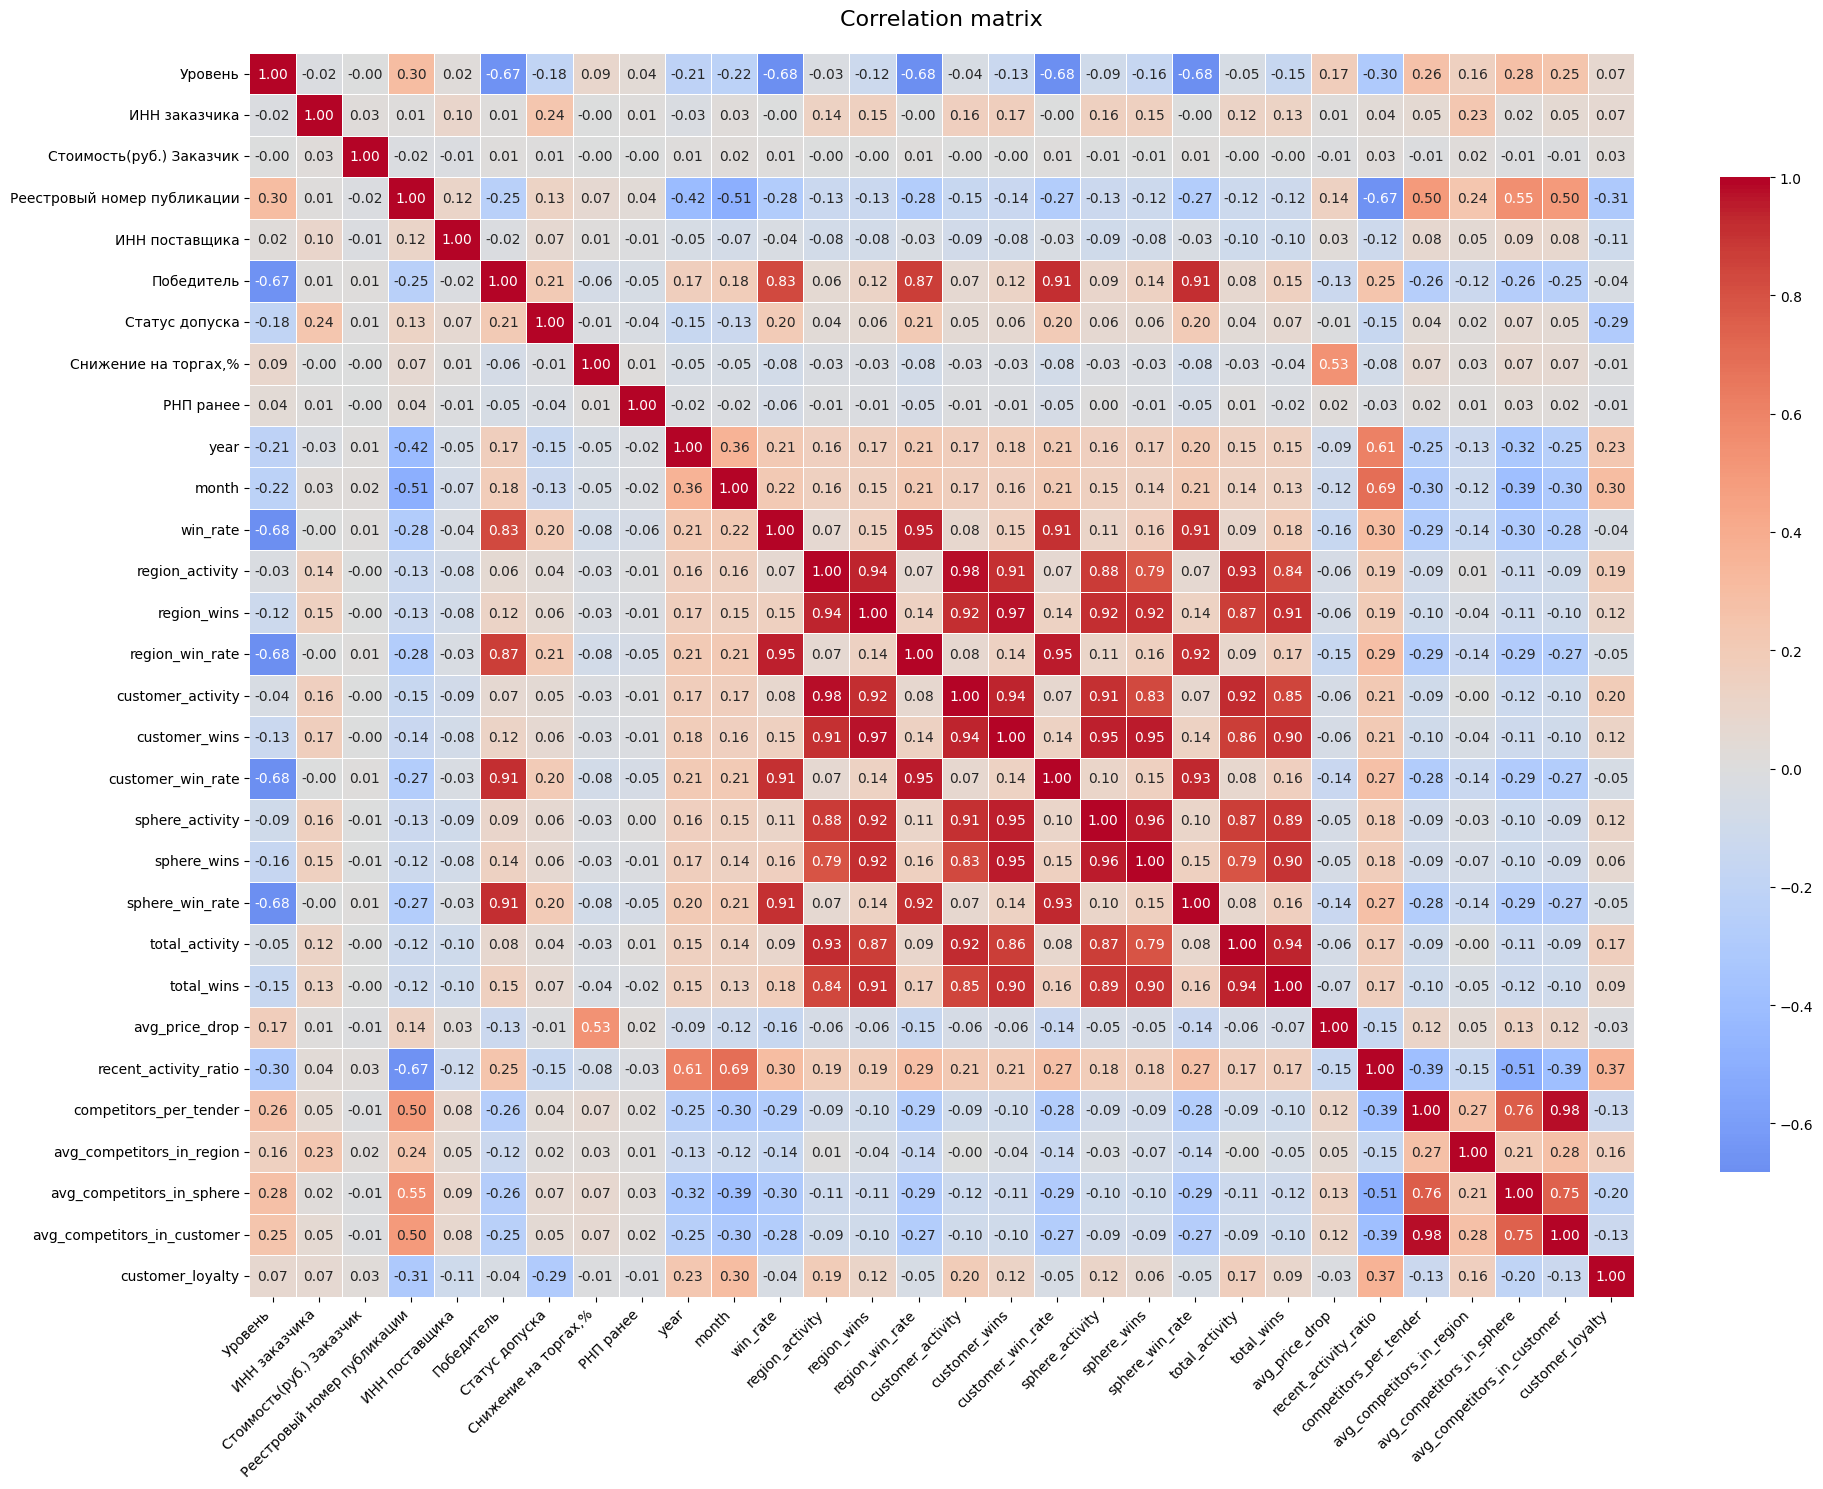

In [26]:
numeric_cols = data.select_dtypes(include=['number']).columns
corr_matrix = data[numeric_cols].corr()

plt.figure(figsize=(20, 15))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation matrix", pad=20, fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [27]:
target_corr = corr_matrix['Победитель'].sort_values(key=abs, ascending=False)
print("\nTop 20 correlations with target variable:")
print(target_corr.head(20))


Top 20 correlations with target variable:
Победитель                     1.00
customer_win_rate              0.91
sphere_win_rate                0.91
region_win_rate                0.87
win_rate                       0.83
Уровень                       -0.67
avg_competitors_in_sphere     -0.26
competitors_per_tender        -0.26
recent_activity_ratio          0.25
Реестровый номер публикации   -0.25
avg_competitors_in_customer   -0.25
Статус допуска                 0.21
month                          0.18
year                           0.17
total_wins                     0.15
sphere_wins                    0.14
avg_price_drop                -0.13
avg_competitors_in_region     -0.12
customer_wins                  0.12
region_wins                    0.12
Name: Победитель, dtype: float64


В целом, что и логично, корреляция между соответствующими признаками activity и win_rate достаточно высокая, поэтому можем удалить признаки activity

Высоко коррелируют еще глобальный win_rate с win_rate по региону, по сфере деятельности и по заказчику, но пока удалять их не будем - для второго шага обучения они могут быть полезны

In [28]:
data = data.drop(columns=['region_activity', 'customer_activity', 'sphere_activity', 'total_activity'])

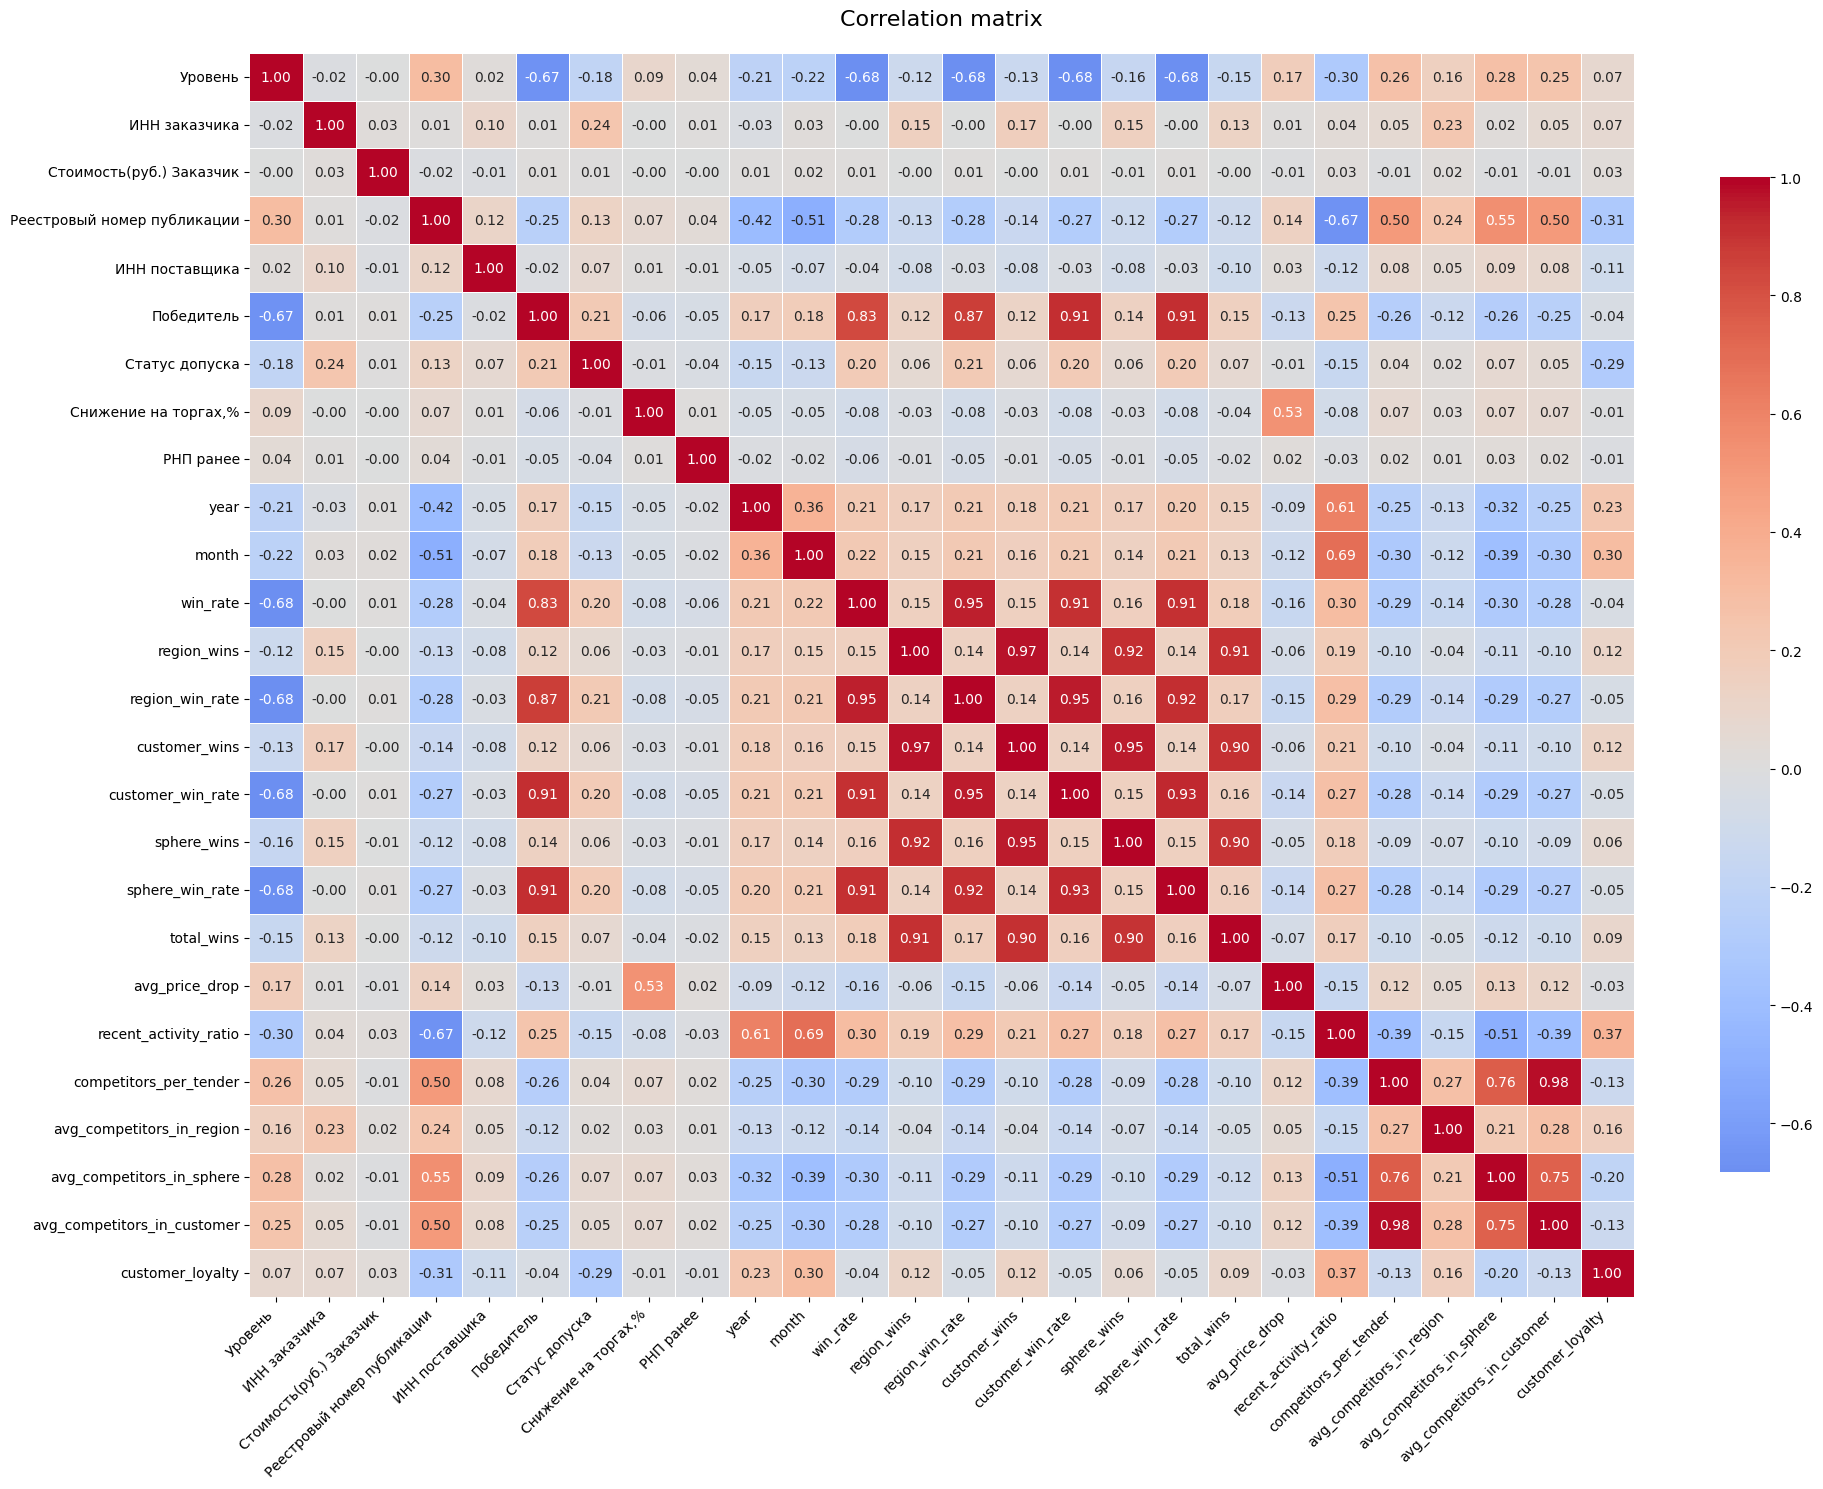

In [29]:
numeric_cols = data.select_dtypes(include=['number']).columns
corr_matrix = data[numeric_cols].corr()


plt.figure(figsize=(20, 15))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation matrix", pad=20, fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Проверим стат значимость признаков

In [30]:
from scipy import stats

won_data = data[data['Победитель'] == 1] 
lost_data = data[data['Победитель'] == 0]


numeric_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_features = [col for col in numeric_features if 'Победитель' not in col]

print("Statistical significance tests:\n")
print("T-test results:")

for feature in numeric_features:
    #t-test
    statistic, p_value = stats.ttest_ind(
        won_data[feature].dropna(),
        lost_data[feature].dropna(),
        equal_var=False 
    )
    
    print(f"\n{feature}")
    print(f"t-statistic: {statistic:.4f}")
    print(f"p-value: {p_value:.10f}")
    print(f"Statistically significant: {p_value < 0.05}")

Statistical significance tests:

T-test results:

Уровень
t-statistic: -357.8675
p-value: 0.0000000000
Statistically significant: True

ИНН заказчика
t-statistic: 2.9877
p-value: 0.0028113176
Statistically significant: True

Стоимость(руб.) Заказчик
t-statistic: 3.1702
p-value: 0.0015236767
Statistically significant: True

Реестровый номер публикации
t-statistic: -79.1116
p-value: 0.0000000000
Statistically significant: True

ИНН поставщика
t-statistic: -8.0992
p-value: 0.0000000000
Statistically significant: True

Статус допуска
t-statistic: 64.2023
p-value: 0.0000000000
Statistically significant: True

Снижение на торгах,%
t-statistic: -23.3828
p-value: 0.0000000000
Statistically significant: True

РНП ранее
t-statistic: -13.5902
p-value: 0.0000000000
Statistically significant: True

win_rate
t-statistic: 458.2137
p-value: 0.0000000000
Statistically significant: True

region_wins
t-statistic: 44.2734
p-value: 0.0000000000
Statistically significant: True

region_win_rate
t-statistic: 

In [31]:
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
categorical_features = [col for col in categorical_features 
                      if 'Победитель' not in col 
                      and 'Дата' not in col]

print("\n\nChi-square test results:")

for feature in categorical_features:
    contingency = pd.crosstab(data[feature], data['Победитель'])
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency)
    
    print(f"\n{feature}")
    print(f"chi2 statistic: {chi2:.4f}")
    print(f"p-value: {p_value:.10f}")
    print(f"Statistically significant: {p_value < 0.05}")



Chi-square test results:

Заказчик
chi2 statistic: 41915.8358
p-value: 0.0000000000
Statistically significant: True

Сфера деятельности
chi2 statistic: 28136.2296
p-value: 0.0000000000
Statistically significant: True

Регион поставки
chi2 statistic: 6128.1842
p-value: 0.0000000000
Statistically significant: True

Город поставки
chi2 statistic: 16527.7308
p-value: 0.0000000000
Statistically significant: True

Поставщик
chi2 statistic: 68917.2423
p-value: 0.0000000000
Statistically significant: True

Форма публикации
chi2 statistic: 0.0000
p-value: 1.0000000000
Statistically significant: False

Тип торгов
chi2 statistic: 48655.0863
p-value: 0.0000000000
Statistically significant: True


Все числовые статистически значимые, а в категориальных незначимым оказался только признак Форма публикации, его использовать не будем

In [32]:
data.isna().sum()

Уровень                                                                                                                   0
Заказчик                                                                                                                  0
ИНН заказчика                                                                                                             0
Стоимость(руб.) Заказчик                                                                                                  0
Реестровый номер публикации                                                                                               0
Сфера деятельности                                                                                                        0
Регион поставки                                                                                                           0
Город поставки                                                                                                            0
Дата пуб

In [33]:
data['win_rate'].describe()

count   100,564.00
mean          0.59
std           0.41
min           0.00
25%           0.17
50%           0.66
75%           1.00
max           1.00
Name: win_rate, dtype: float64

Пока заменю пропуски (новые фичи, которые попали в тест и имеют пропуски) - по ближайшим соседям

В отличие от заполнения медианой (когда все пропуски в столбце заполняются одним и тем же числом – медианой этого столбца), KNNImputer учитывает значения других признаков для конкретной строки. Если две строки похожи по 10 признакам, вероятно, их значения 11-го признака (даже если он пропущен у одной из них) тоже будут близки (он меряе т расстояние между строками через nan_euclidean_distances)

***Здесь можно протестить точность заполнения, сравнив с реально посчитанными по тесту значениями***

In [34]:
from sklearn.impute import KNNImputer


columns_to_impute = [
    'win_rate', 'region_wins', 'region_win_rate',
    'customer_wins', 'customer_win_rate', 'sphere_wins',
    'sphere_win_rate', 'total_wins', 'avg_price_drop',
    'recent_activity_ratio', 'competitors_per_tender',
    'avg_competitors_in_region', 'avg_competitors_in_sphere',
    'avg_competitors_in_customer', 'customer_loyalty'
]
#протестила, так заполнять лучше, чем медианами
imputer = KNNImputer(n_neighbors=5) 
data[columns_to_impute] = imputer.fit_transform(data[columns_to_impute])

In [35]:
def hierarchical_median_impute(df, columns_to_fill, group_hierarchy):
    for col in columns_to_fill:
        is_null = df[col].isnull()
        for groups in group_hierarchy:
            if len(groups) == 0:
                global_median = df[col].median()
                df.loc[is_null, col] = global_median
                break
            medians = df.groupby(groups)[col].transform('median')
            df.loc[is_null, col] = df.loc[is_null, col].fillna(medians)
            is_null = df[col].isnull()
            if not is_null.any():
                break
        print(f"Column {col}: {is_null.sum()} remaining nulls")
    return df


group_hierarchy = [['Сфера деятельности', 'Регион поставки'],['Сфера деятельности'],['Регион поставки'],[]]
columns_to_impute = [
    'win_rate', 'region_wins', 'region_win_rate',
    'customer_wins', 'customer_win_rate', 'sphere_wins',
    'sphere_win_rate', 'total_wins', 'avg_price_drop',
    'recent_activity_ratio', 'competitors_per_tender',
    'avg_competitors_in_region', 'avg_competitors_in_sphere',
    'avg_competitors_in_customer', 'customer_loyalty'
]
#data = hierarchical_median_impute(df=data,columns_to_fill=columns_to_impute,group_hierarchy=group_hierarchy)

In [36]:
data['win_rate'].describe()

count   109,875.00
mean          0.59
std           0.39
min           0.00
25%           0.25
50%           0.59
75%           1.00
max           1.00
Name: win_rate, dtype: float64

In [37]:
data.isna().sum()

Уровень                                                                                                                   0
Заказчик                                                                                                                  0
ИНН заказчика                                                                                                             0
Стоимость(руб.) Заказчик                                                                                                  0
Реестровый номер публикации                                                                                               0
Сфера деятельности                                                                                                        0
Регион поставки                                                                                                           0
Город поставки                                                                                                            0
Дата пуб

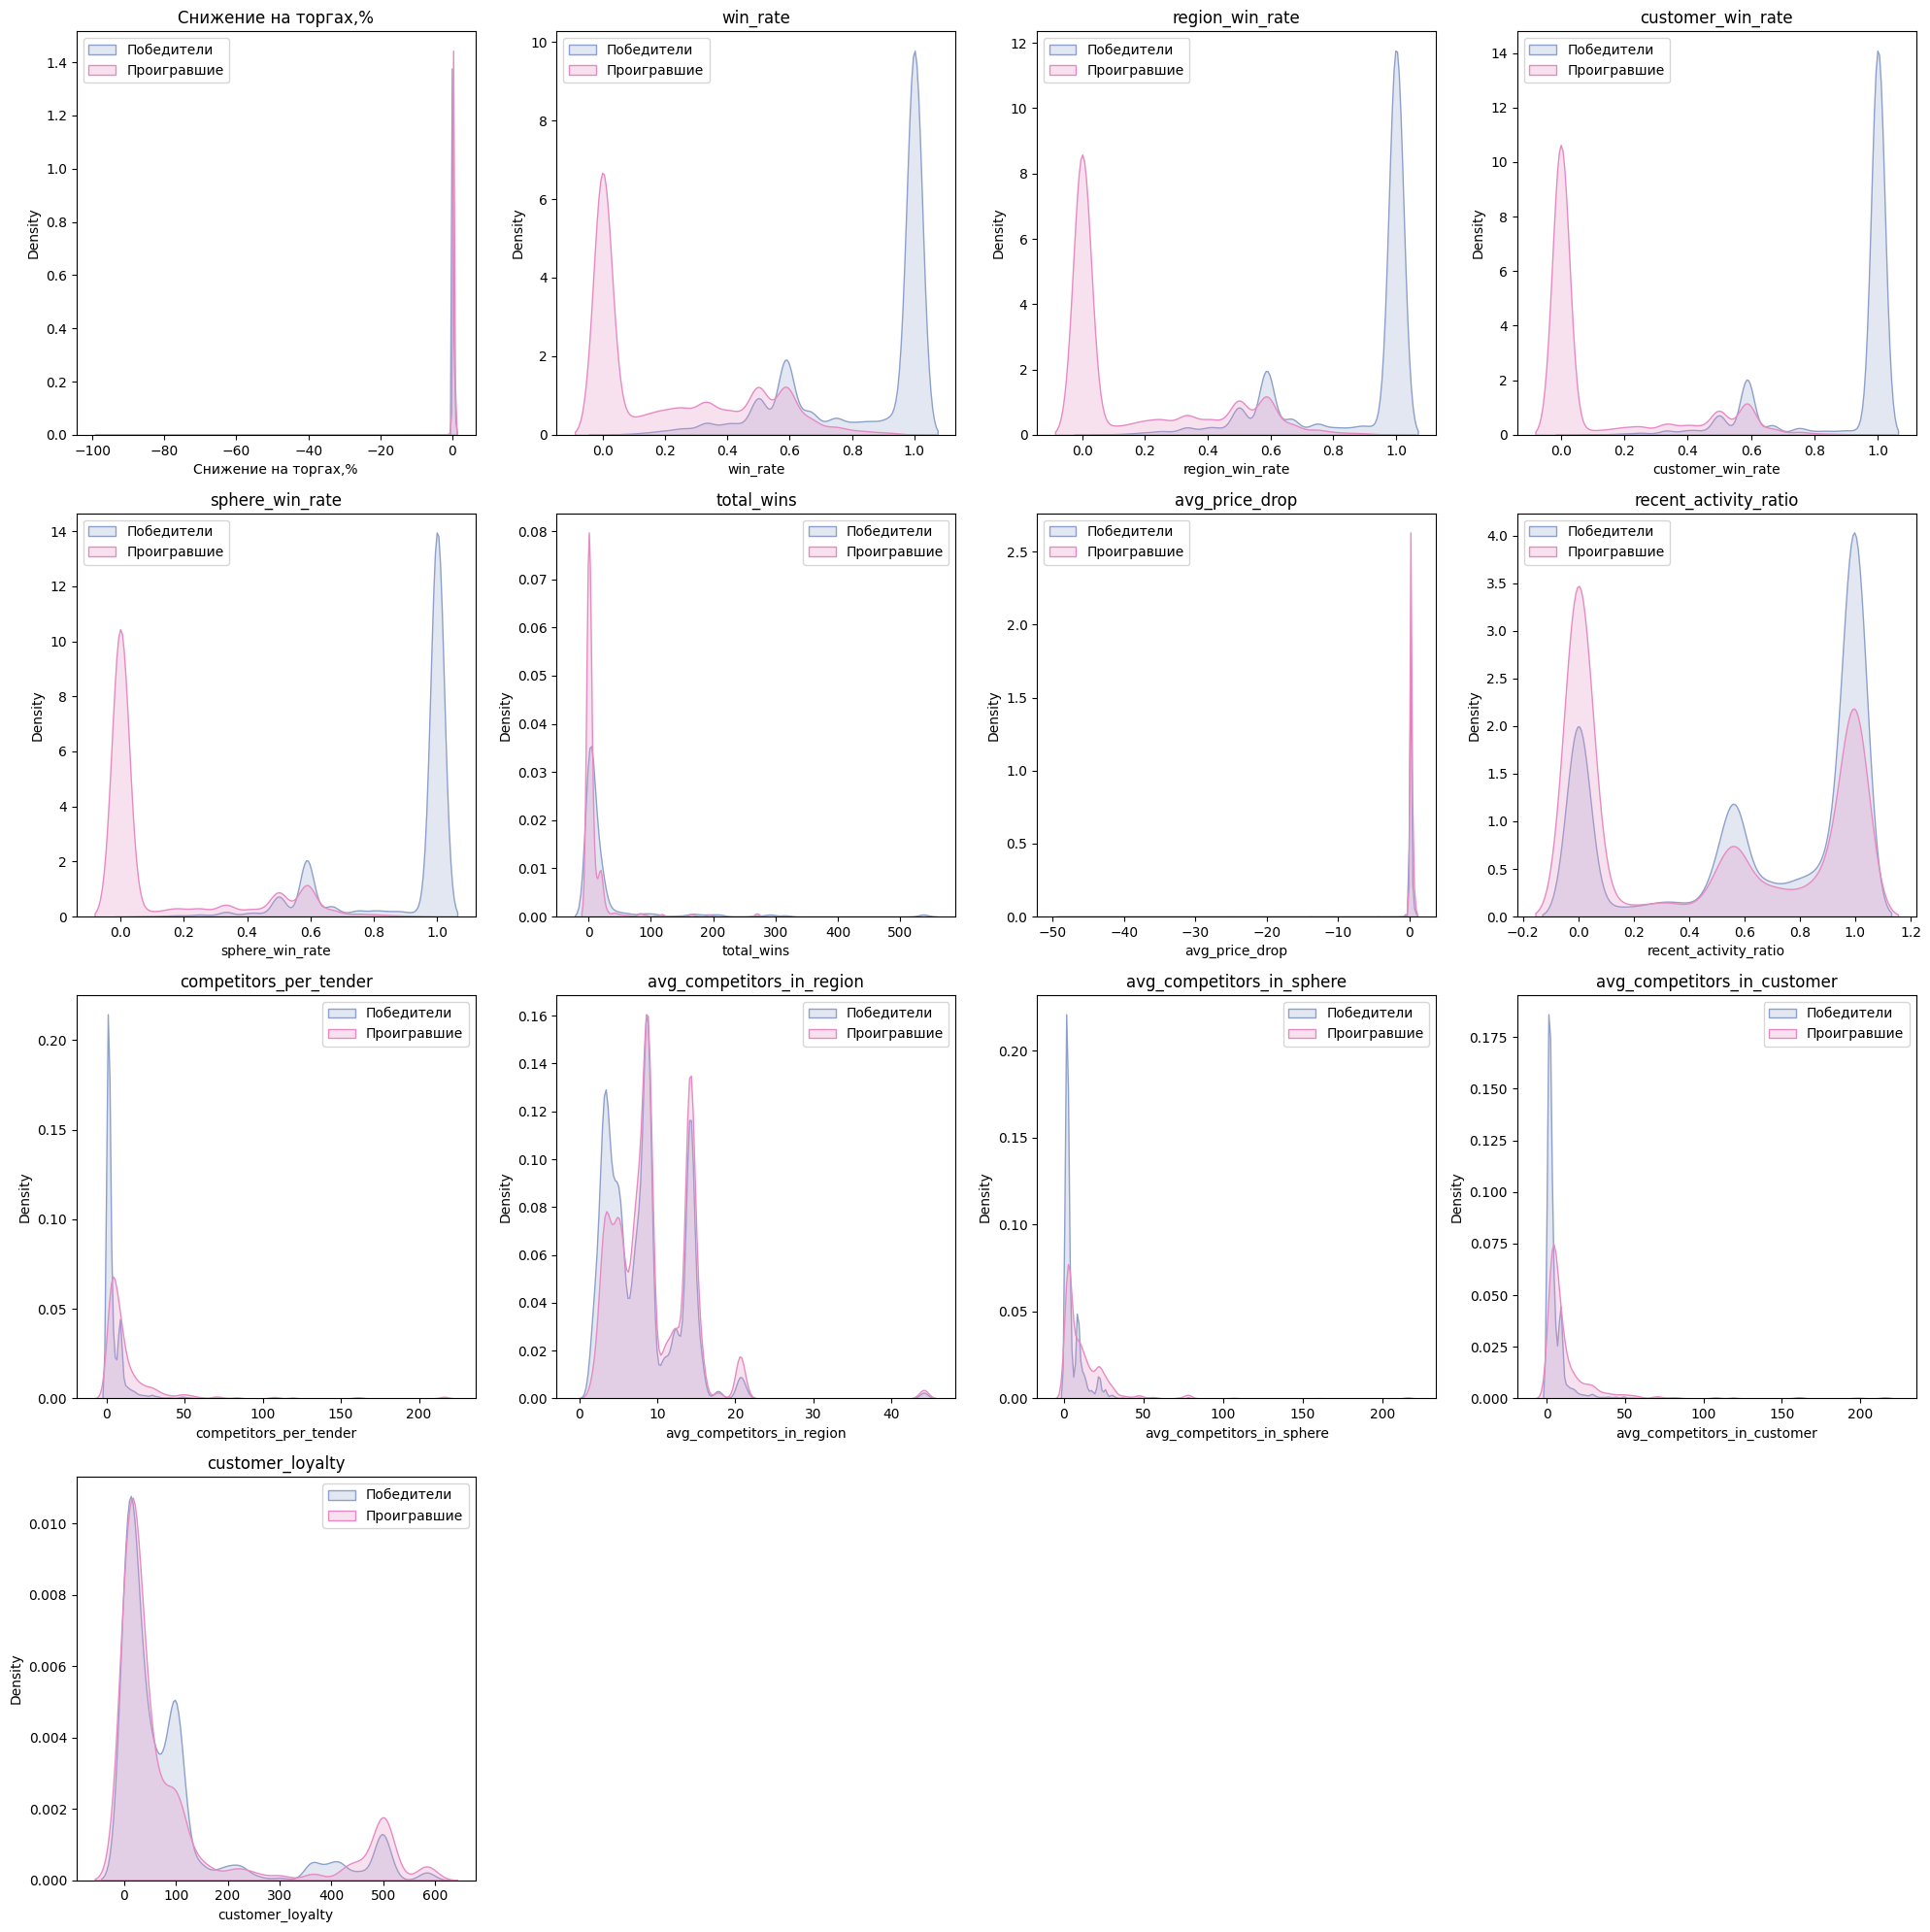

In [38]:
#numeric_features = data.select_dtypes(include=['float64', 'int64']).columns
numeric_features = ['Снижение на торгах,%', 'win_rate', 'region_win_rate', 'customer_win_rate', 'sphere_win_rate', 'total_wins', 'avg_price_drop', 'recent_activity_ratio', 'competitors_per_tender', 'avg_competitors_in_region', 'avg_competitors_in_sphere', 'avg_competitors_in_customer', 'customer_loyalty']
numeric_features = [col for col in numeric_features if col != 'Победитель']

n_features = len(numeric_features)
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes_flat = axes.flatten()

for idx, feature in enumerate(numeric_features):
    sns.kdeplot(data=data[data['Победитель']==1][feature], 
                ax=axes_flat[idx], 
                label='Победители',
                fill=True, color=sns.color_palette("Set2")[2])
    sns.kdeplot(data=data[data['Победитель']==0][feature], 
                ax=axes_flat[idx], 
                label='Проигравшие',
                fill=True, color=sns.color_palette("Set2")[3])
    axes_flat[idx].set_title(feature)
    axes_flat[idx].legend()

for idx in range(len(numeric_features), len(axes_flat)):
    fig.delaxes(axes_flat[idx])

plt.tight_layout()
plt.show()

Customer loyalty совсем не зависит от победы, поэтому удалим его, по всем остальным вроде все адекватно

In [39]:
data = data.drop(columns=['customer_loyalty'])

Разберемся с временными признаками

/var/folders/7_/sz_ftshd1b1b9sppxlm9vj9m0000gn/T/ipykernel_25093/4079871207.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g3.set_xticklabels(['Пн','Вт','Ср','Чт','Пт','Сб','Вс'])


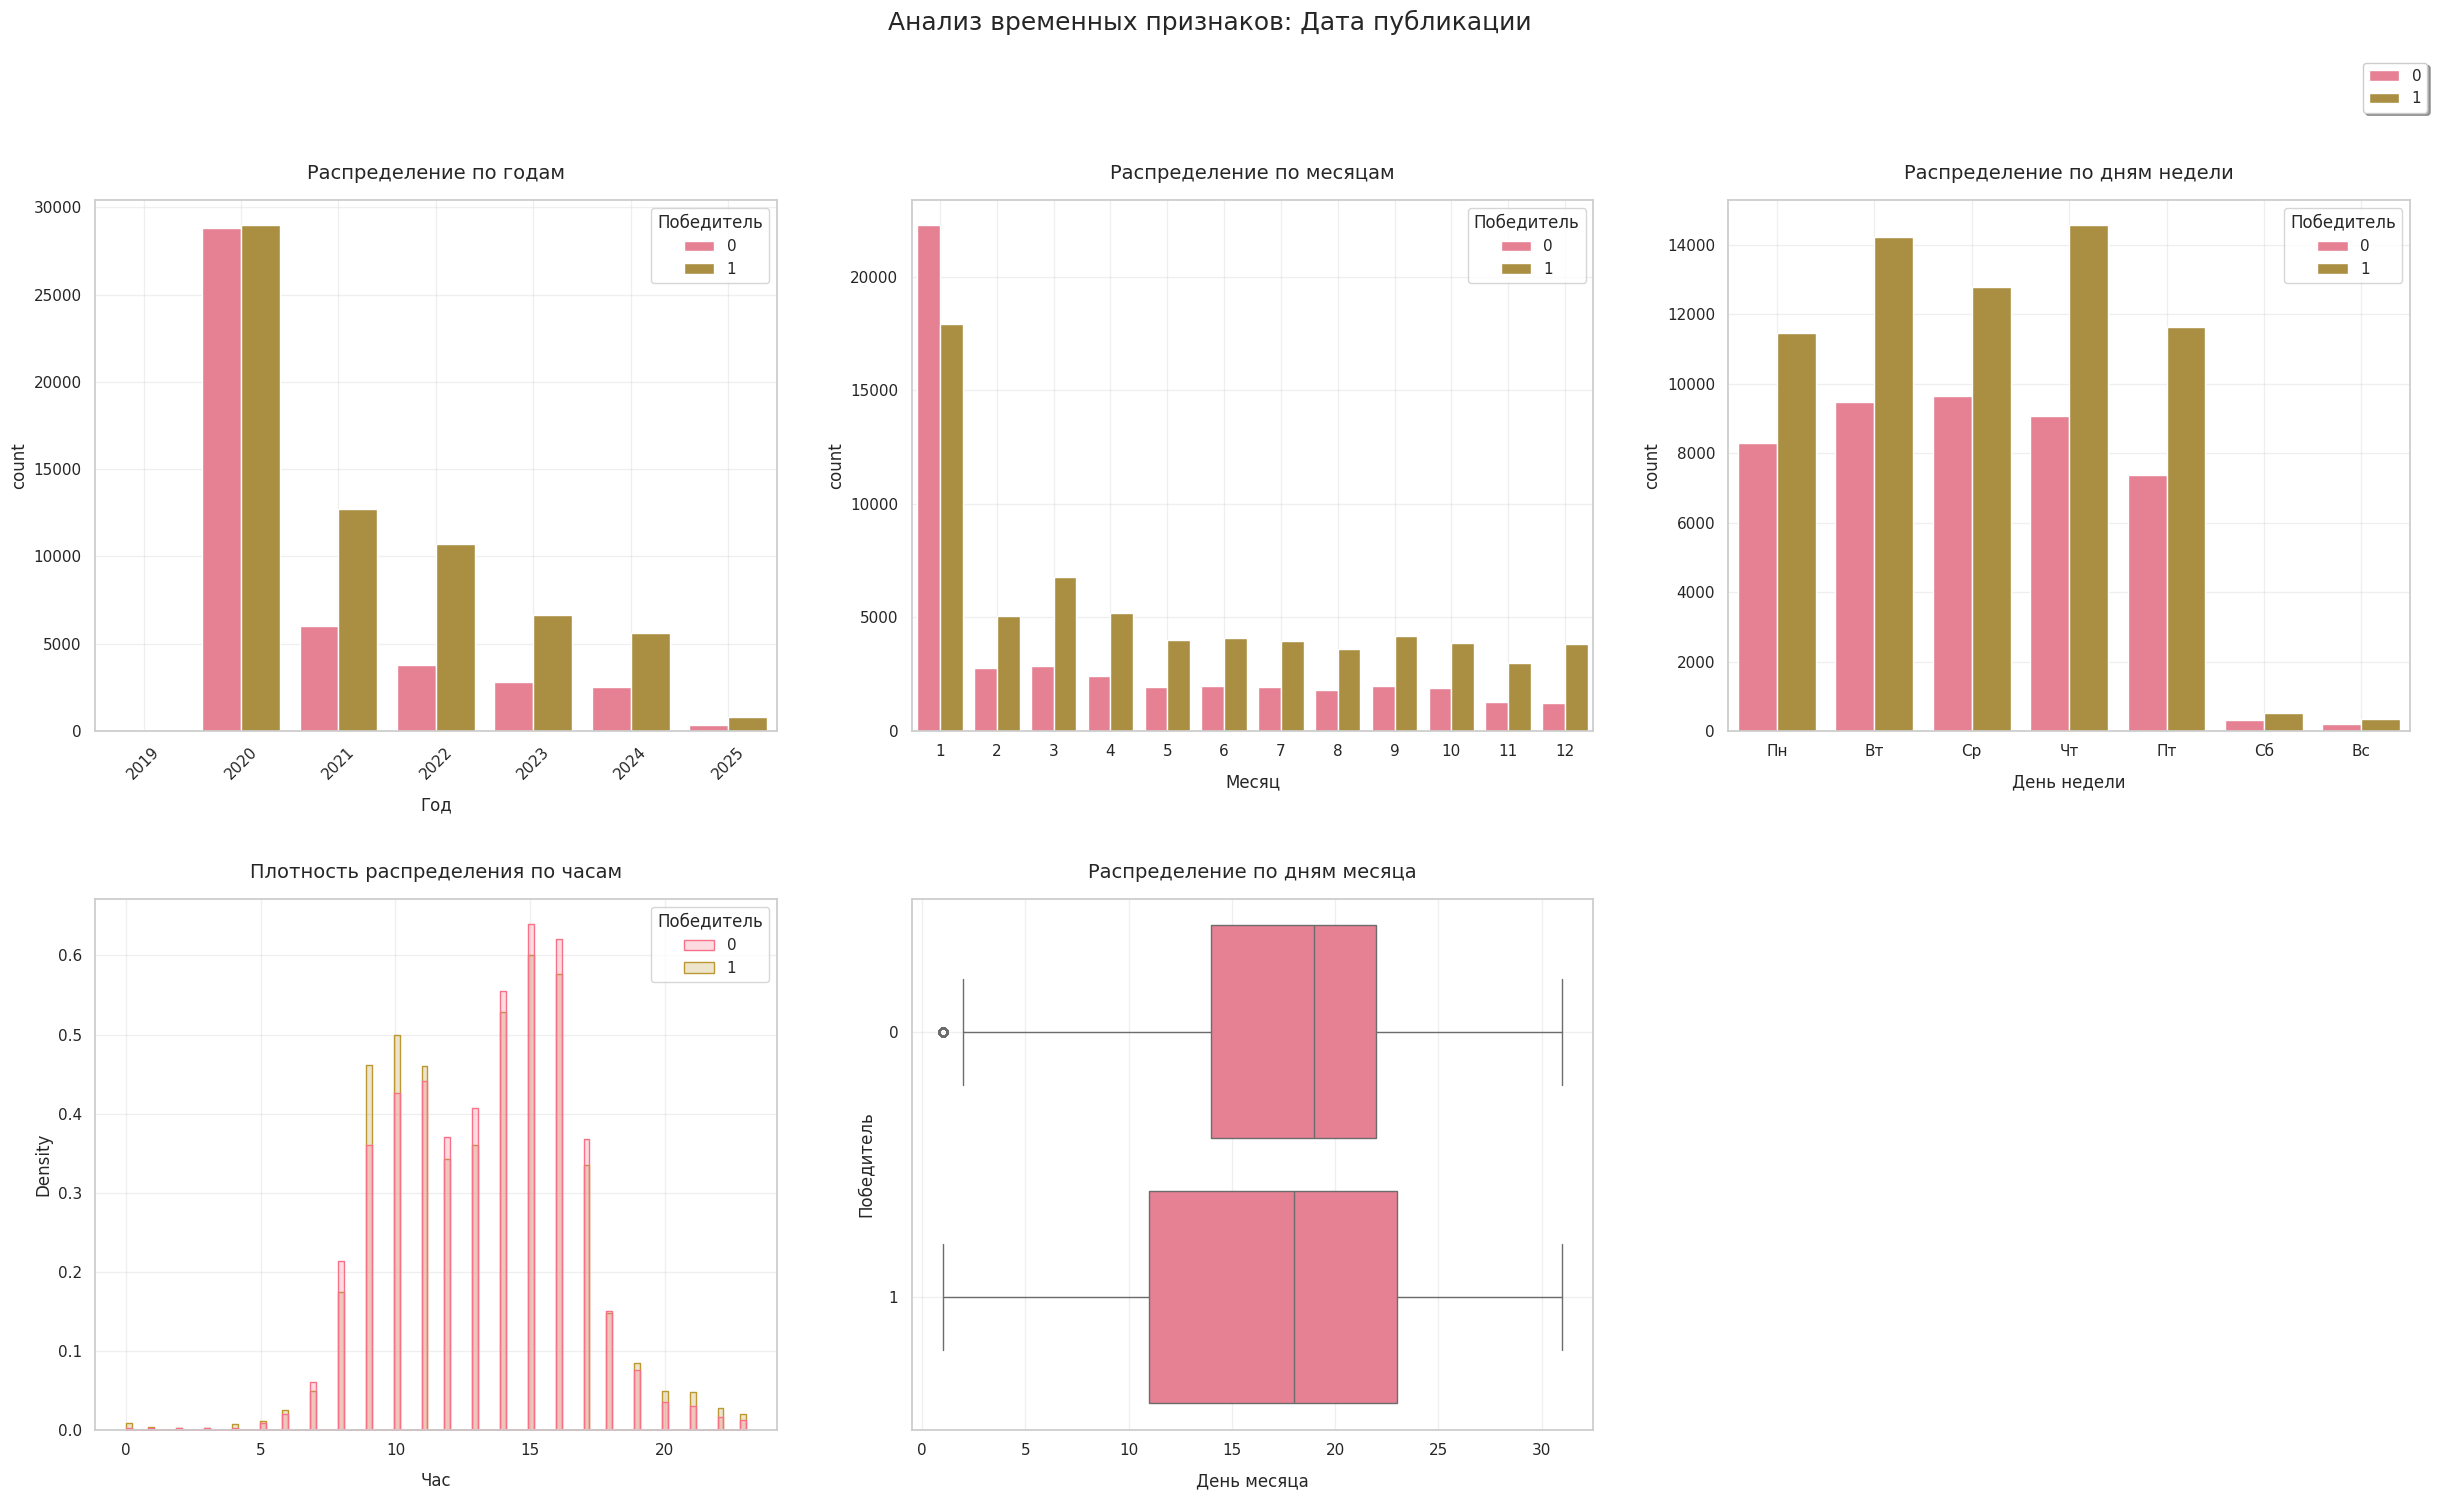

/var/folders/7_/sz_ftshd1b1b9sppxlm9vj9m0000gn/T/ipykernel_25093/4079871207.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g3.set_xticklabels(['Пн','Вт','Ср','Чт','Пт','Сб','Вс'])


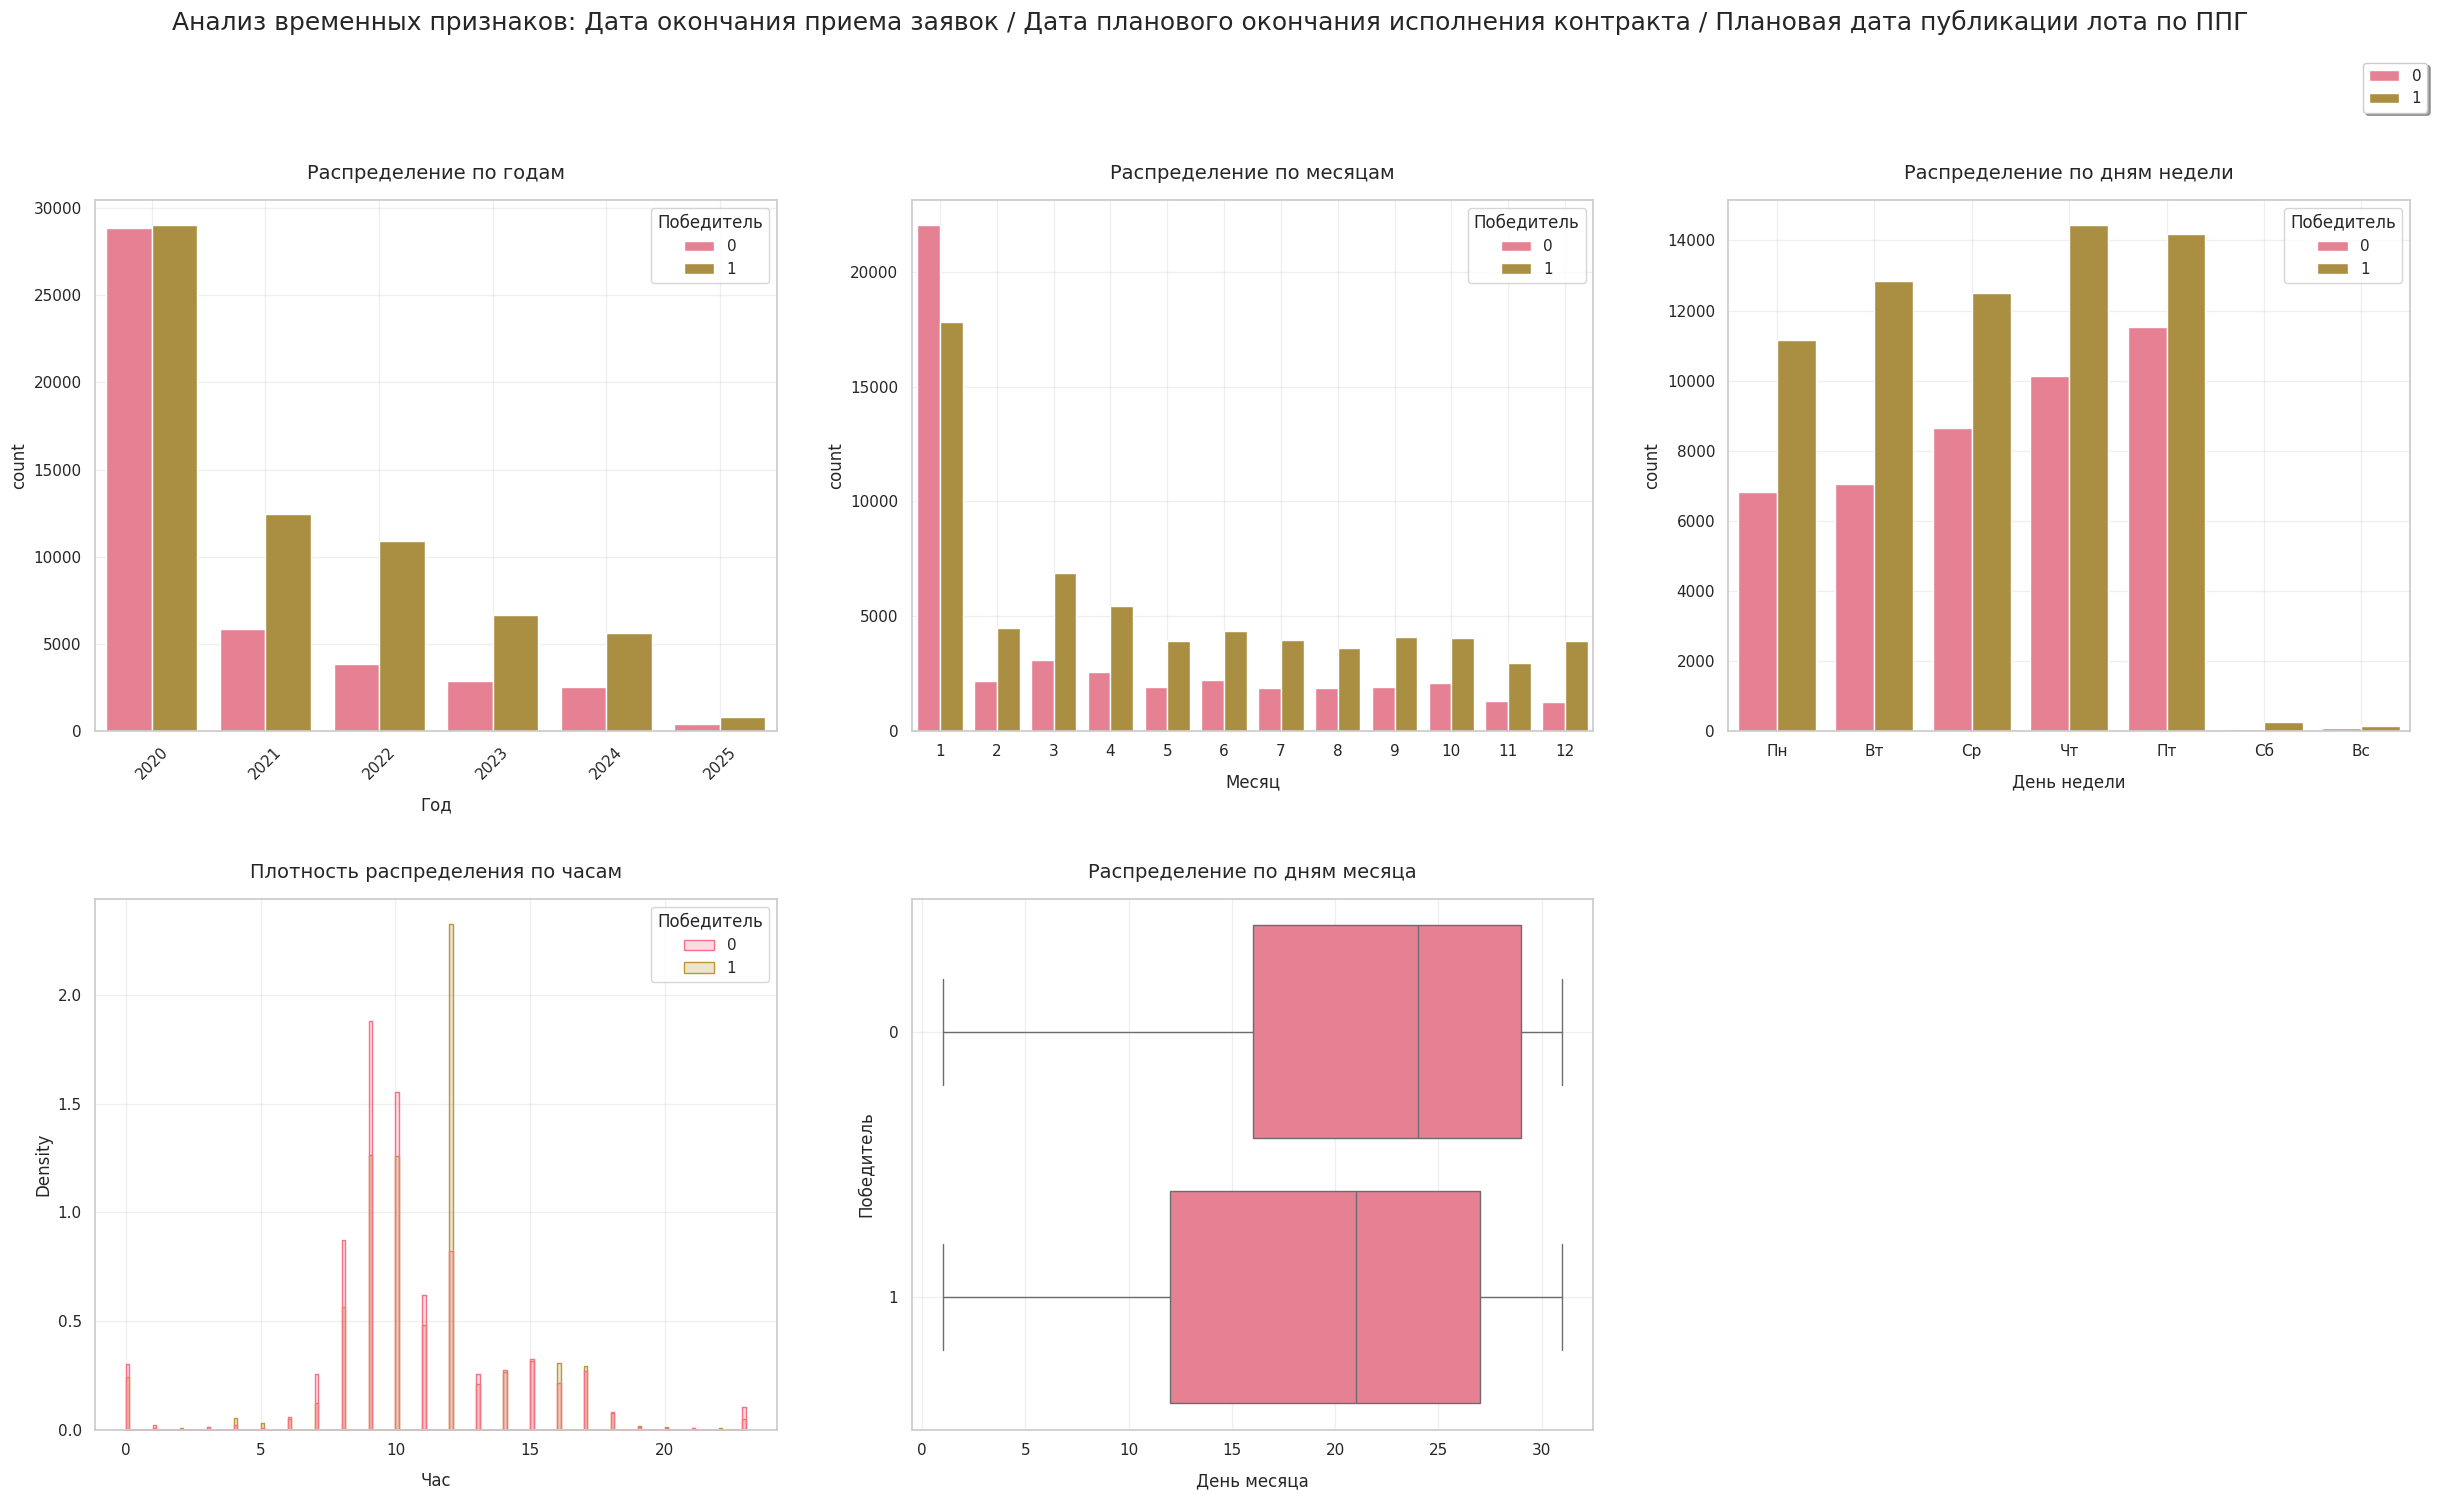

/var/folders/7_/sz_ftshd1b1b9sppxlm9vj9m0000gn/T/ipykernel_25093/4079871207.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g3.set_xticklabels(['Пн','Вт','Ср','Чт','Пт','Сб','Вс'])


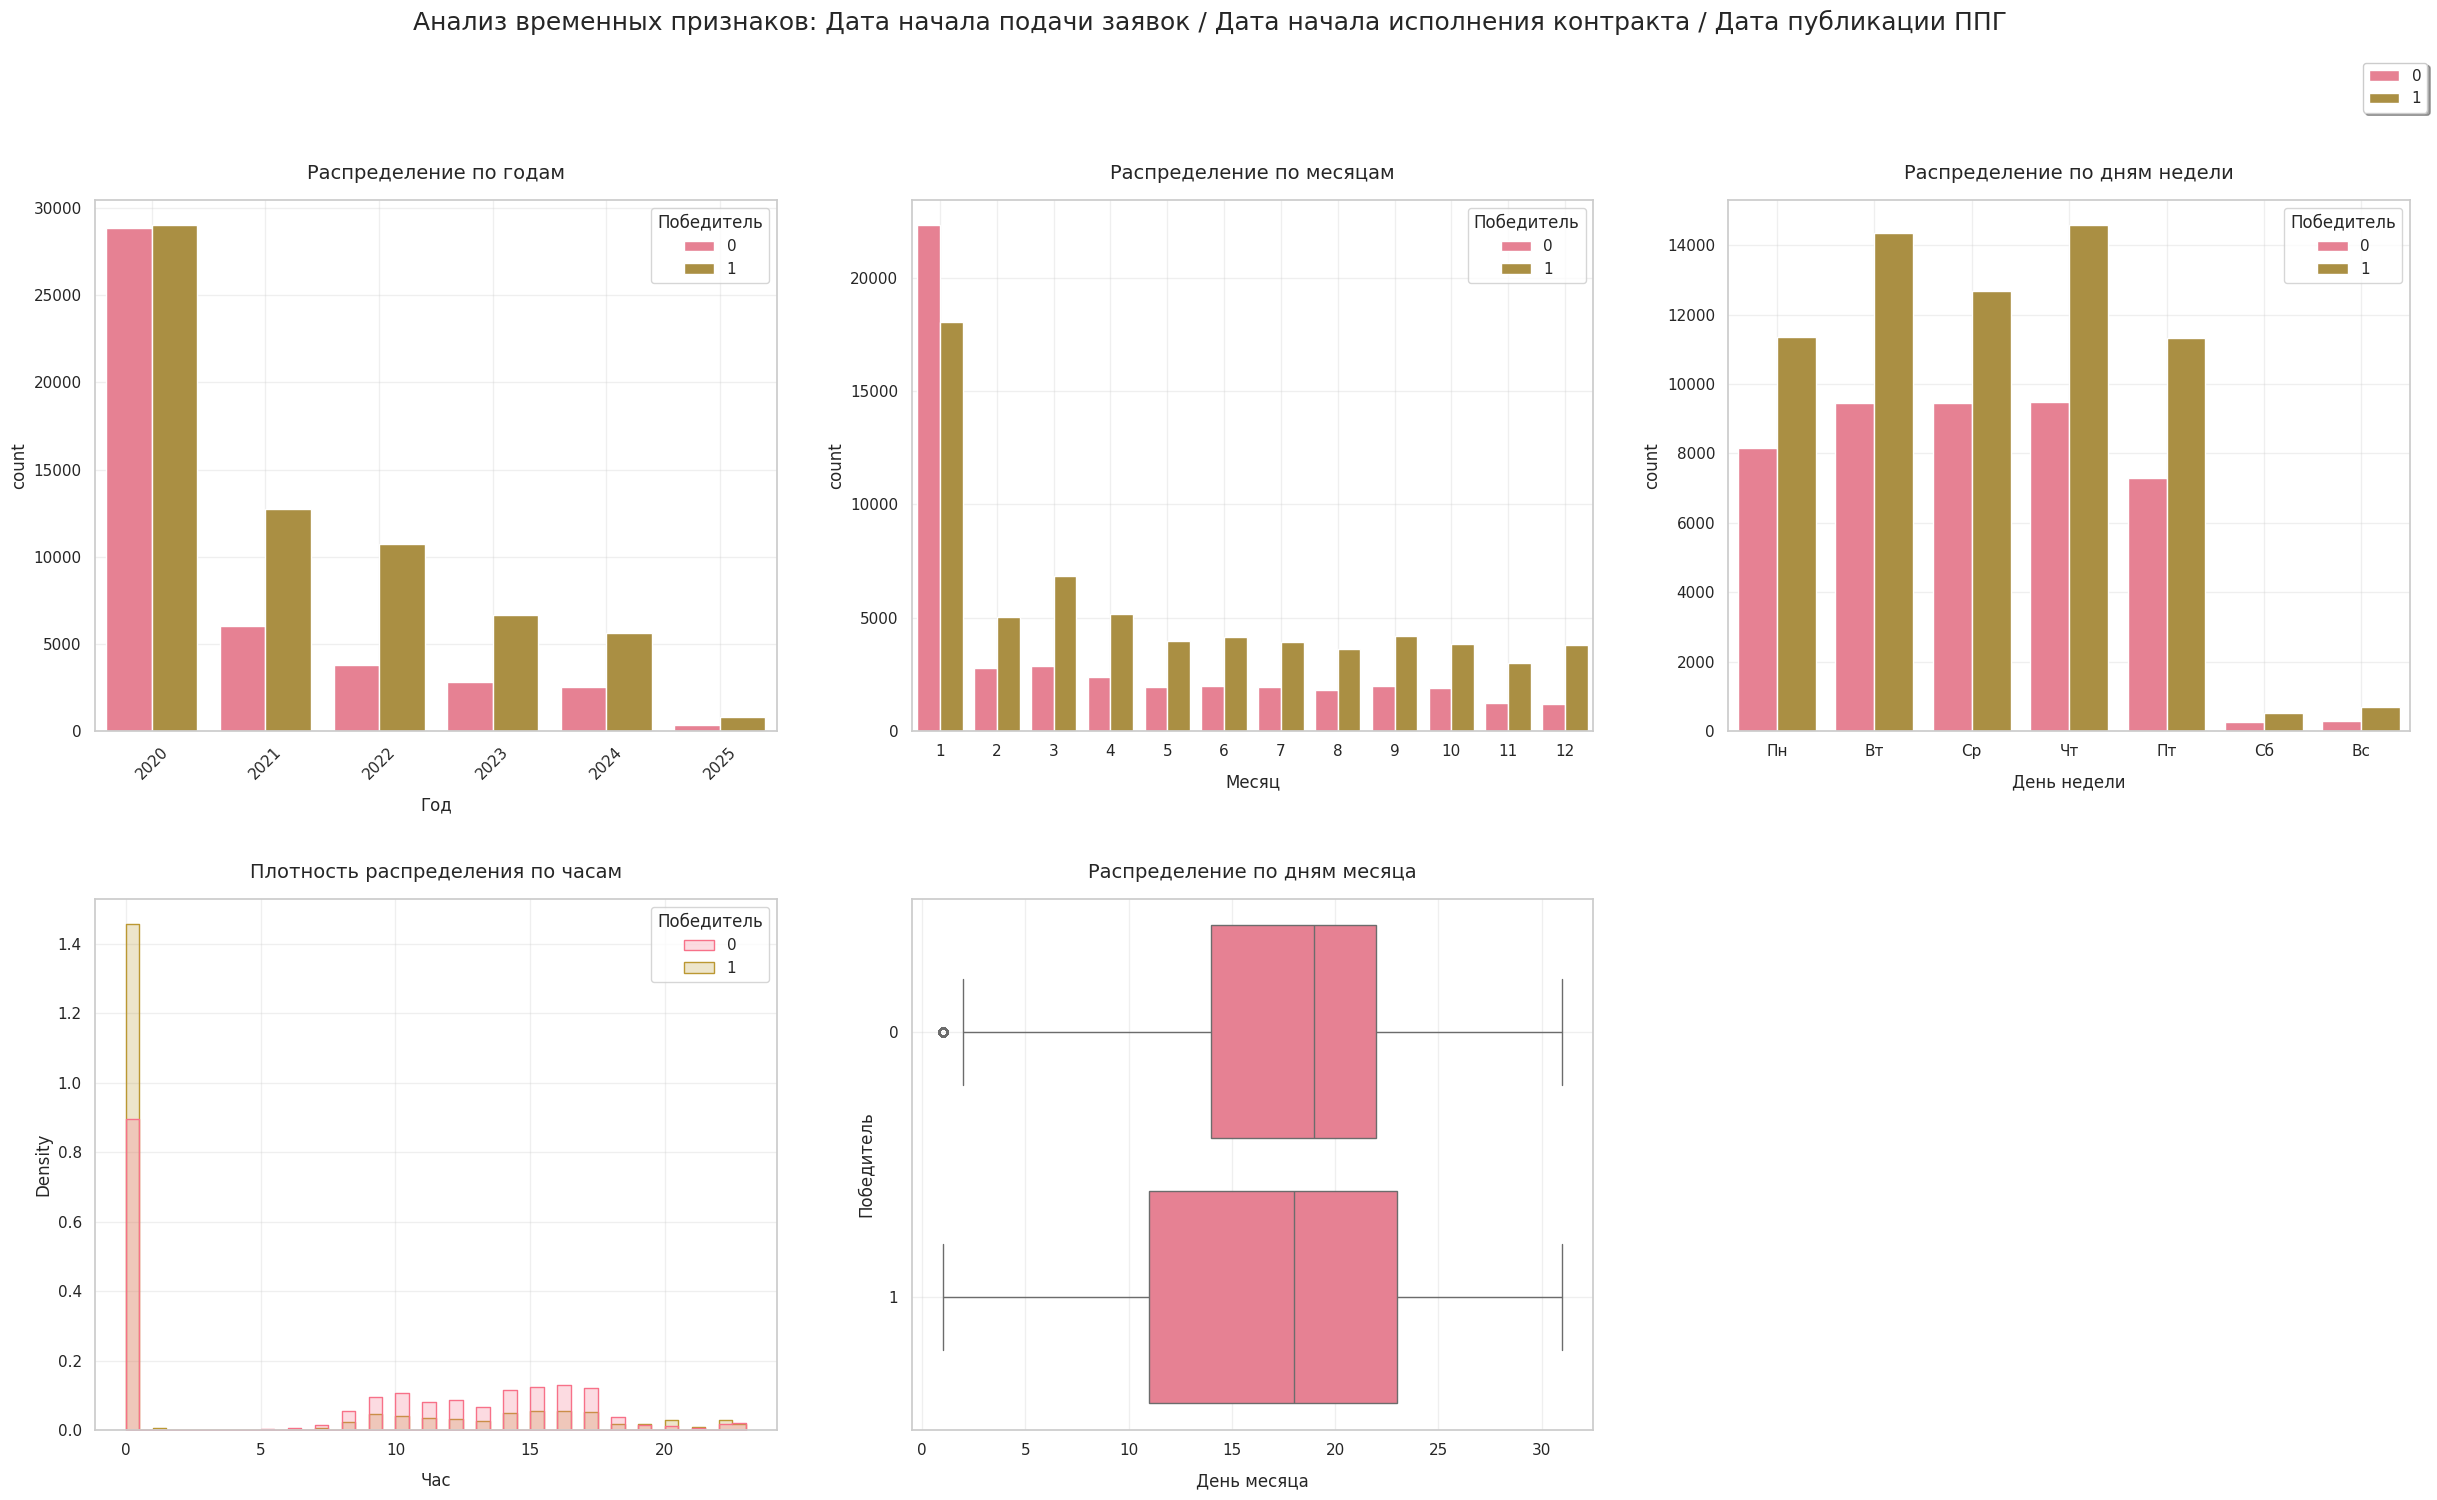

/var/folders/7_/sz_ftshd1b1b9sppxlm9vj9m0000gn/T/ipykernel_25093/4079871207.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g3.set_xticklabels(['Пн','Вт','Ср','Чт','Пт','Сб','Вс'])


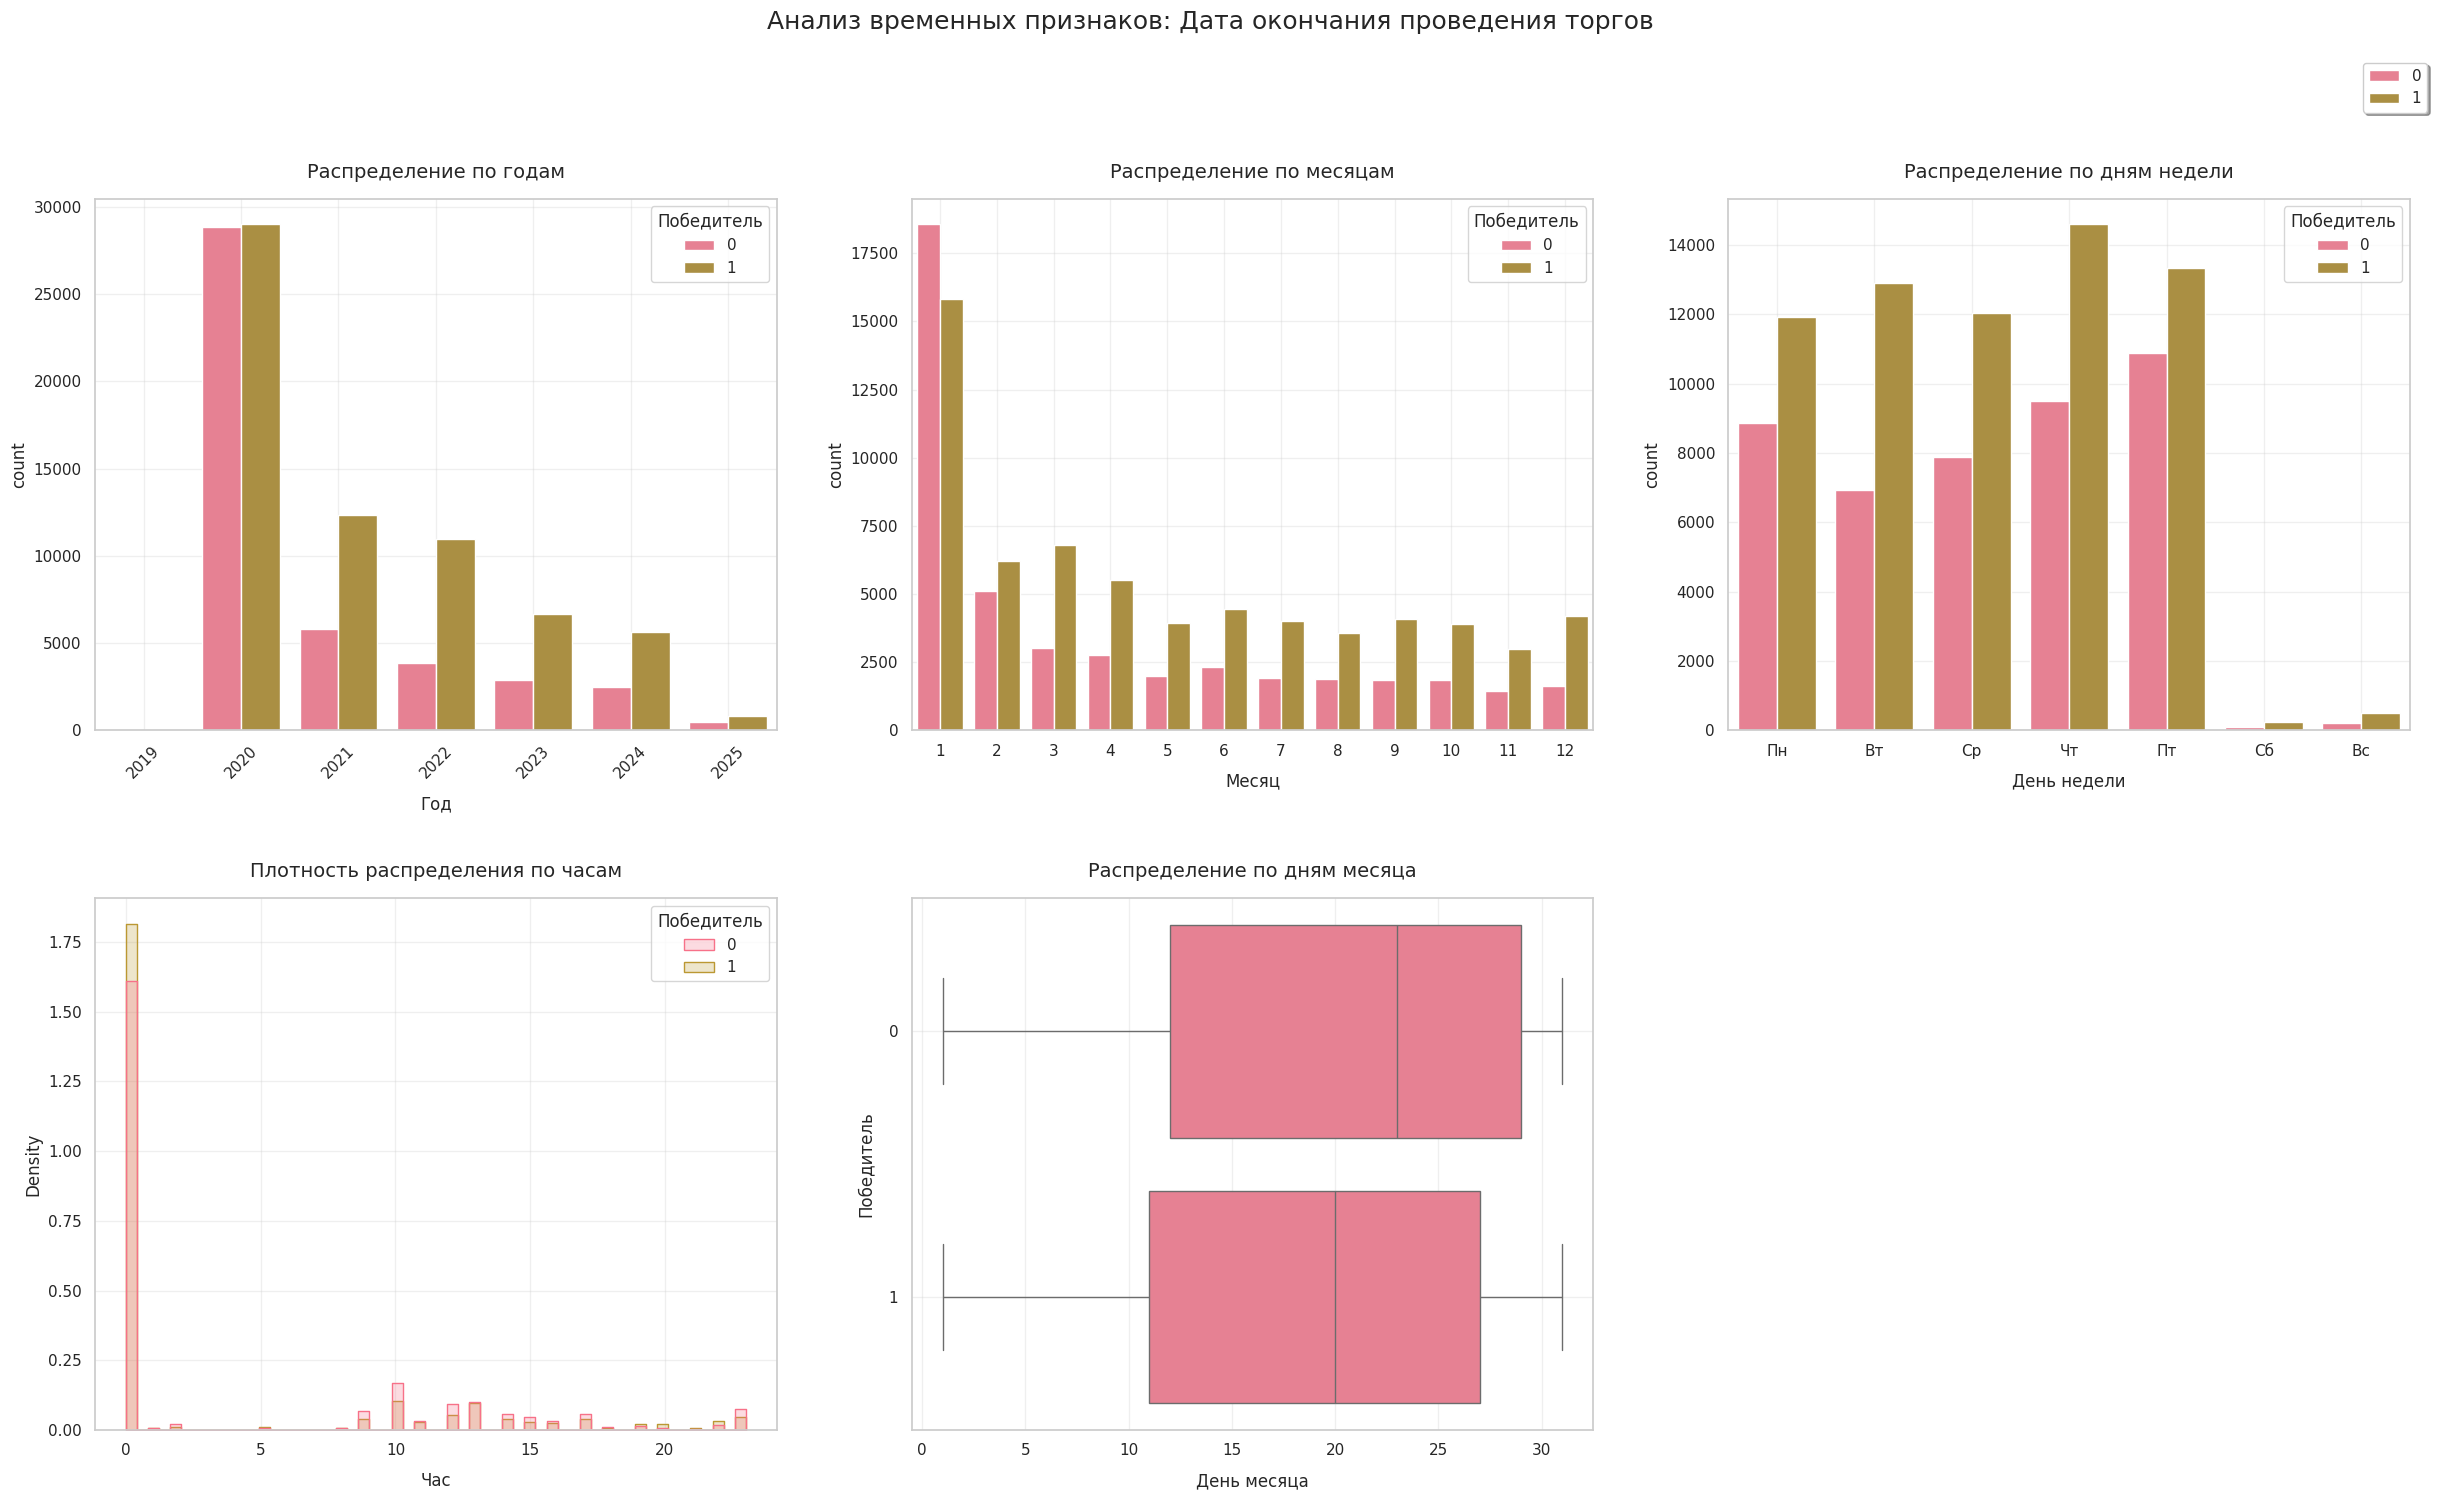

In [40]:
sns.set_theme(style="whitegrid", palette="husl")
plt.rcParams['font.family'] = 'DejaVu Sans'  
time_features = ['Дата публикации',
 'Дата окончания приема заявок / Дата планового окончания исполнения контракта / Плановая дата публикации лота по ППГ',
 'Дата начала подачи заявок / Дата начала исполнения контракта / Дата публикации ППГ',
 'Дата окончания проведения торгов']


for time_col in time_features:
    fig, axs = plt.subplots(2, 3, figsize=(25, 15))
    fig.delaxes(axs[1,2])  
    fig.suptitle(f'Анализ временных признаков: {time_col}', fontsize=18, y=1.02)
    
    df_plot = data.assign(year=data[time_col].dt.year,month=data[time_col].dt.month,day=data[time_col].dt.day,
        dayofweek=data[time_col].dt.dayofweek,hour=data[time_col].dt.hour
    )
    
    g1 = sns.countplot(x='year', hue='Победитель', data=df_plot,ax=axs[0,0])
    g1.set_title('Распределение по годам', pad=15)
    g1.set_xlabel('Год', labelpad=10)
    g1.tick_params(axis='x', rotation=45)
    
    g2 = sns.countplot(x='month', hue='Победитель', data=df_plot,ax=axs[0,1])
    g2.set_title('Распределение по месяцам', pad=15)
    g2.set_xlabel('Месяц', labelpad=10)
    
    g3 = sns.countplot(x='dayofweek', hue='Победитель',  data=df_plot,ax=axs[0,2])
    g3.set_title('Распределение по дням недели', pad=15)
    g3.set_xticklabels(['Пн','Вт','Ср','Чт','Пт','Сб','Вс'])
    g3.set_xlabel('День недели', labelpad=10)
    
    g4 = sns.histplot(data=df_plot, x='hour', hue='Победитель', element='step', stat='density', common_norm=False, ax=axs[1,0])
    g4.set_title('Плотность распределения по часам', pad=15)
    g4.set_xlabel('Час', labelpad=10)
    
    g5 = sns.boxplot(x='day', y='Победитель', data=df_plot, orient='h', ax=axs[1,1])
    g5.set_title('Распределение по дням месяца', pad=15)
    g5.set_xlabel('День месяца', labelpad=10)
    g5.set_ylabel('Победитель', labelpad=10)
    
    plt.tight_layout(pad=3.0)
    for ax in axs.flat:
        ax.grid(True, alpha=0.3)
        ax.title.set_fontsize(14)
        ax.xaxis.label.set_fontsize(12)
        ax.yaxis.label.set_fontsize(12)
        
    handles, labels = g1.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(0.99, 0.99),frameon=True,shadow=True)
    plt.show()

Из интересного: в январе больше проигравших, во всех остальных месяцах больше победителей - добавим признак на январь. Также добавим разницу между датой окончания приема заявок и датой начала подачи заявок - если, например, дней между ними мало, то это может означаться, что участников будет мало и победителя определить проще. 

Еще видно, что если публикация по времени происходит в 9-11, то победителей больше, чем в другое время (вероятно потому, что в таких тендерах участников меньше), аналогично по окончанию приема заявок в 12. Если начало подачи заявок в 12 ночи, то победителей также больше (аналогично с окончанием проведения торгов в 12 ночи)

В общем, пока добавим все это как признаки

In [41]:
data['is_january'] = data['month'].apply(lambda x: 1 if x == 1 else 0)
data['days_between'] = (data['Дата окончания приема заявок / Дата планового окончания исполнения контракта / Плановая дата публикации лота по ППГ'] - 
                       data['Дата начала подачи заявок / Дата начала исполнения контракта / Дата публикации ППГ']).dt.days

data['publication_peak_9_11'] = data['Дата публикации'].dt.hour.between(9, 11, inclusive='both').astype(int)
data['app_end_noon_12'] = (data['Дата окончания приема заявок / Дата планового окончания исполнения контракта / Плановая дата публикации лота по ППГ'].dt.hour == 12).astype(int)
data['app_start_night_12'] = (data['Дата начала подачи заявок / Дата начала исполнения контракта / Дата публикации ППГ'].dt.hour == 0).astype(int)
data['trade_end_night_12'] = (data['Дата окончания проведения торгов'].dt.hour == 0).astype(int)

____________________________________________________________________________________________________________________

**Encoding and scaling**

In [42]:
data.dtypes

Уровень                                                                                                                         int64
Заказчик                                                                                                                       object
ИНН заказчика                                                                                                                   int64
Стоимость(руб.) Заказчик                                                                                                      float64
Реестровый номер публикации                                                                                                     int64
Сфера деятельности                                                                                                             object
Регион поставки                                                                                                                object
Город поставки                                                

In [43]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num = [
    "avg_price_drop",
    "Стоимость(руб.) Заказчик",
    "Снижение на торгах,%"
]

cat = [
    "Сфера деятельности",
    "Регион поставки",
    "Город поставки",
    "Форма публикации",
    "Тип торгов"
]

binary_features = [
    "Статус допуска", 
    "РНП ранее", 
    "is_january", 
    "publication_peak_9_11", 
    "app_end_noon_12", 
    "app_start_night_12",
    "trade_end_night_12"
]

passthrough_features = ["Статус допуска", "РНП ранее", "is_january", "publication_peak_9_11", "app_end_noon_12", "app_start_night_12",
                        "trade_end_night_12", "days_between", 'year', 'month','win_rate', 'region_wins', 'region_win_rate', 'customer_wins',
                        'customer_win_rate', 'sphere_wins', 'sphere_win_rate', 'total_wins',
                        'recent_activity_ratio',
                        'competitors_per_tender', 'avg_competitors_in_region',
                        'avg_competitors_in_sphere', 'avg_competitors_in_customer']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat),
        ('pass', 'passthrough', passthrough_features)
    ],
    remainder='drop'
    )

train = data[data['year'].isin(range(2019, 2023))]
test = data[data['year'].isin(range(2023, 2026))]
X_train = train[num + cat + passthrough_features]
y_train = train["Победитель"]
X_test = test[num + cat + passthrough_features]
y_test = test["Победитель"]

In [44]:
print(X_test.shape)
print(X_train.shape)

(18736, 31)
(91139, 31)


____________________________________________________________________________________________________________________

**Модели**

In [45]:
def evaluate_model(name, y_true, y_pred, y_proba):
    print(f"\n{name} Metrics:")
    print("Accuracy:", round(accuracy_score(y_true, y_pred), 4))
    print("Precision:", round(precision_score(y_true, y_pred), 4))
    print("Recall:", round(recall_score(y_true, y_pred), 4))
    print("F1-Score:", round(f1_score(y_true, y_pred), 4))
    print("ROC-AUC:", round(roc_auc_score(y_true, y_proba), 4))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    
    plt.figure(figsize=(10, 8))
    conf_matrix = confusion_matrix(y_true, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Winner', 'Winner'],
                yticklabels=['Not Winner', 'Winner'])
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

Важный вопрос - какая метрика нам все-таки важнее, precision или recall? Как будто для задачи победителя тендера, нам интереснее recall, поскольку мы хотим не пропустить потенциальных победителей, но это пока мысли (то есть мы можем пожертвовать precision - лучше попадет несколько ложных, но среди всех предсказанных с большей вероятностью будет потенциальный победитель) - так как пока неясно, подбираю по f1, то есть по сумме precision и recall

1. KNN (k nearest neighbors)

In [46]:
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

In [47]:
from sklearn.model_selection import GridSearchCV
#здесь было рассмотрено в разы больше параметров, сейчас оставлено немного, чтобы перезапускать удобнее
param_grid = {
    'classifier__n_neighbors': [19, 21],
    'classifier__weights': ['distance'],
    'classifier__p': [1], 
    'classifier__metric': ['minkowski']
}

grid_search = GridSearchCV(
    knn_pipeline,
    param_grid,
    cv=3,
    scoring='f1',
    verbose=2,
    error_score='raise'
)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END classifier__metric=minkowski, classifier__n_neighbors=17, classifier__p=1, classifier__weights=distance; total time=  21.4s
[CV] END classifier__metric=minkowski, classifier__n_neighbors=17, classifier__p=1, classifier__weights=distance; total time=  20.7s
[CV] END classifier__metric=minkowski, classifier__n_neighbors=17, classifier__p=1, classifier__weights=distance; total time=  20.8s
[CV] END classifier__metric=minkowski, classifier__n_neighbors=19, classifier__p=1, classifier__weights=distance; total time=  22.3s
[CV] END classifier__metric=minkowski, classifier__n_neighbors=19, classifier__p=1, classifier__weights=distance; total time=  22.4s
[CV] END classifier__metric=minkowski, classifier__n_neighbors=19, classifier__p=1, classifier__weights=distance; total time=  21.4s


GridSearchCV(cv=3, error_score='raise',
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['avg_price_drop',
                                                                          'Стоимость(руб.) '
                                                                          'Заказчик',
                                                                          'Снижение '
                                                                          'на '
                                                                          'торгах,%']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Сфера '
                                                                          'деятельности',
                                                                          'Регион '
                                                                          'поставки',
                                                                          'Город '
                                                                          'поставки',
                                                                          'Форма '
                                                                          'публикации',
                                                                          'Тип '
                                                                          'торгов'])...
                                                                          'total_wins',
                                                                          'recent_activity_ratio',
                                                                          'competitors_per_tender',
                                                                          'avg_competitors_in_region',
                                                                          'avg_competitors_in_sphere',
                                                                          'avg_competitors_in_customer'])])),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__metric': ['minkowski'],
                         'classifier__n_neighbors': [17, 19],
                         'classifier__p': [1],
                         'classifier__weights': ['distance']},
             scoring='f1', verbose=2)


Best parameters: {'classifier__metric': 'minkowski', 'classifier__n_neighbors': 19, 'classifier__p': 1, 'classifier__weights': 'distance'}
Best F1 score: 0.9346

Best KNN Model Metrics:
Accuracy: 0.8082
Precision: 0.7977
Recall: 0.9715
F1-Score: 0.876
ROC-AUC: 0.8884

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.43      0.58      5668
           1       0.80      0.97      0.88     13068

    accuracy                           0.81     18736
   macro avg       0.83      0.70      0.73     18736
weighted avg       0.82      0.81      0.79     18736

Confusion Matrix:
[[ 2448  3220]
 [  373 12695]]


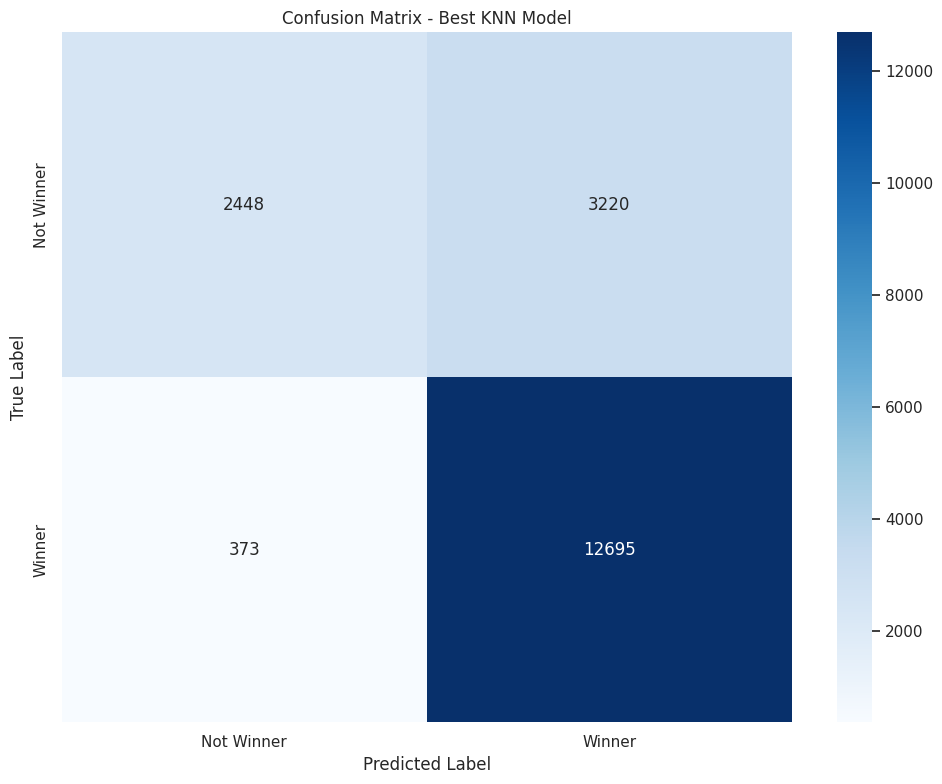

In [48]:
print("\nBest parameters:", grid_search.best_params_)
print("Best F1 score:", round(grid_search.best_score_, 4))
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)
y_proba = best_knn.predict_proba(X_test)[:, 1]
evaluate_model("Best KNN Model", y_test, y_pred, y_proba)

#recall наибольший при n_neighbours = 15 или 13

In [49]:
from sklearn.inspection import permutation_importance
best_knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=19, weights='distance', metric='minkowski', p = 1))
])

In [50]:
X_transformed = preprocessor.fit_transform(X_train).toarray() 
X_transformed.shape

(91139, 7275)

In [51]:
def plot_permutation_importance(model, preprocessor, X, y, title):
    X_transformed = preprocessor.fit_transform(X).toarray()  
    model.fit(X_transformed, y)
    result = permutation_importance(
        model, 
        X_transformed, 
        y,
        n_repeats=3,
        random_state=42,
        scoring='f1',
        max_samples = 7000
    )
    
    feature_names = preprocessor.get_feature_names_out()
    sorted_idx = result.importances_mean.argsort()[::-1]
    
    plt.figure(figsize=(12, 8))
    plt.title(f"Permutation Importance ({title})")
    plt.boxplot(
        result.importances[sorted_idx].T,
        vert=False,
        labels=feature_names[sorted_idx]
    )
    plt.xlabel("Decrease in F1")
    plt.tight_layout()
    plt.show()

In [52]:
from joblib import Parallel, delayed
from tqdm.auto import tqdm

def plot_permutation_importance(model, preprocessor, X, y, title):
    X_transformed = preprocessor.fit_transform(X).toarray()
    model.fit(X_transformed, y)
    
    def _process_feature(feature_idx):
        result = permutation_importance(
            model,
            X_transformed,
            y,
            n_repeats=2,
            random_state=42,
            scoring='f1',
            max_samples=3000,
            n_jobs=1  
        )
        return result.importances[feature_idx]
    

    n_features = X_transformed.shape[1]
    results = Parallel(n_jobs=-1)(
        delayed(_process_feature)(feature_idx) 
        for feature_idx in tqdm(range(n_features), desc="Processing features")
    )
    result = permutation_importance_result(
        importances=np.array([r[0] for r in results]),
        means=np.array([r[1] for r in results]),
        stds=np.array([r[2] for r in results])
    )
 
    feature_names = preprocessor.get_feature_names_out()
    sorted_idx = result.importances_mean.argsort()[::-1][:20]
    
    plt.figure(figsize=(12, 6))
    plt.barh(feature_names[sorted_idx], result.importances_mean[sorted_idx])
    plt.title(f"Top 20 Features Importance ({title})")
    plt.tight_layout()
    plt.show()


def permutation_importance_result(importances, means, stds):
    return type('', (), {
        'importances': importances,
        'importances_mean': means,
        'importances_std': stds
    })()

In [53]:
from joblib import Parallel, delayed
from tqdm.auto import tqdm

def plot_permutation_importance(model, preprocessor, X, y, title):
    X_transformed = preprocessor.fit_transform(X).toarray()
    model.fit(X_transformed, y)
    n_repeats = 2
    max_samples = 3000
    total_iterations = X_transformed.shape[1] * n_repeats
    with tqdm(total=total_iterations, desc=f"{title} Progress") as pbar:
        result = permutation_importance(
            model,
            X_transformed,
            y,
            n_repeats=n_repeats,
            random_state=42,
            scoring='f1',
            max_samples=max_samples  
        )
        
        for _ in range(total_iterations):
            pbar.update(1)

    feature_names = preprocessor.get_feature_names_out()
    sorted_idx = result.importances_mean.argsort()[::-1][:20]
    
    plt.figure(figsize=(12, 6))
    plt.barh(feature_names[sorted_idx], result.importances_mean[sorted_idx])
    plt.title(f"Top 20 Features Importance ({title})")
    plt.tight_layout()
    plt.show()

In [54]:
sample_idx = np.random.choice(X_train.shape[0], size=int(X_train.shape[0]*0.05), replace=False)
X_sample = X_train.iloc[sample_idx]
y_sample = y_train.iloc[sample_idx]

In [55]:
best_knn_model = KNeighborsClassifier(n_neighbors=17, weights='distance', metric='minkowski', p = 1)
#plot_permutation_importance(best_knn_model, preprocessor, X_sample, y_sample, "KNN")

Из документации по permutation_importance:

***When two features are correlated and one of the features is permuted, the model still has access to the latter through its correlated feature. This results in a lower reported importance value for both features, though they might actually be important***

так что будем это учитывать, возможно в будущем оставим только некоррелированные между собой фичи

2. SVM 

В силу того, что все это чудо обучается бесконечно количество времени (да и признаков на данный момент больше 7к после кодировки), понизим размерность данных и поробуем на них 

In [56]:
'''
from sklearn.decomposition import PCA

X_transformed = preprocessor.fit_transform(X_train).toarray()

pca = PCA()
pca.fit(X_transformed)
cumsum = np.cumsum(pca.explained_variance_ratio_)
n_components_95 = np.argmax(cumsum >= 0.95) + 1

pca = PCA(n_components=n_components_95)
X_pca = pca.fit_transform(X_transformed)


plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.axvline(x=n_components_95, color='g', linestyle='--', 
           label=f'Components needed: {n_components_95}')
plt.xlabel('Number of Components')
plt.ylabel('Variance Retained')
plt.legend()
'''

"\nfrom sklearn.decomposition import PCA\n\nX_transformed = preprocessor.fit_transform(X_train).toarray()\n\npca = PCA()\npca.fit(X_transformed)\ncumsum = np.cumsum(pca.explained_variance_ratio_)\nn_components_95 = np.argmax(cumsum >= 0.95) + 1\n\npca = PCA(n_components=n_components_95)\nX_pca = pca.fit_transform(X_transformed)\n\n\nplt.plot(np.cumsum(pca.explained_variance_ratio_))\nplt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')\nplt.axvline(x=n_components_95, color='g', linestyle='--', \n           label=f'Components needed: {n_components_95}')\nplt.xlabel('Number of Components')\nplt.ylabel('Variance Retained')\nplt.legend()\n"

In [57]:
#это уже перебиралось, больше сил нет это запускать
'''
param_grid = {
    'classifier__C': [1, 10, 100],
    'classifier__gamma': ['scale', 0.01],
    'classifier__kernel': ['rbf', 'poly', 'linear'],
    'classifier__class_weight': ['balanced']
}

grid_search = GridSearchCV(
    svm_pipeline,
    param_grid,
    cv=3,
    scoring='f1',
    verbose = 1
)
'''
#grid_search.fit(X_sample, y_sample)
#print("\nBest parameters:", grid_search.best_params_)
#print("Best F1 score:", round(grid_search.best_score_, 4))
#best_svm = grid_search.best_estimator_
#y_pred = best_svm.predict(X_test)
#y_proba = best_svm.predict_proba(X_test)[:, 1]
#evaluate_model("Best SVM Model", y_test, y_pred, y_proba)

"\nparam_grid = {\n    'classifier__C': [1, 10, 100],\n    'classifier__gamma': ['scale', 0.01],\n    'classifier__kernel': ['rbf', 'poly', 'linear'],\n    'classifier__class_weight': ['balanced']\n}\n\ngrid_search = GridSearchCV(\n    svm_pipeline,\n    param_grid,\n    cv=3,\n    scoring='f1',\n    verbose = 1\n)\n"

In [58]:
#чтобы не ждать, пока обучится, брала 40% данных
sample_idx = np.random.choice(X_train.shape[0], size=int(X_train.shape[0]*0.4), replace=False)
X_sample = X_train.iloc[sample_idx]
y_sample = y_train.iloc[sample_idx]

In [59]:
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True, random_state=42, kernel='rbf', class_weight='balanced', C = 150, gamma = 'scale'))
])


SVM Metrics:
Accuracy: 0.8152
Precision: 0.8042
Recall: 0.9716
F1-Score: 0.88
ROC-AUC: 0.9466

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.45      0.60      5668
           1       0.80      0.97      0.88     13068

    accuracy                           0.82     18736
   macro avg       0.84      0.71      0.74     18736
weighted avg       0.83      0.82      0.79     18736

Confusion Matrix:
[[ 2576  3092]
 [  371 12697]]


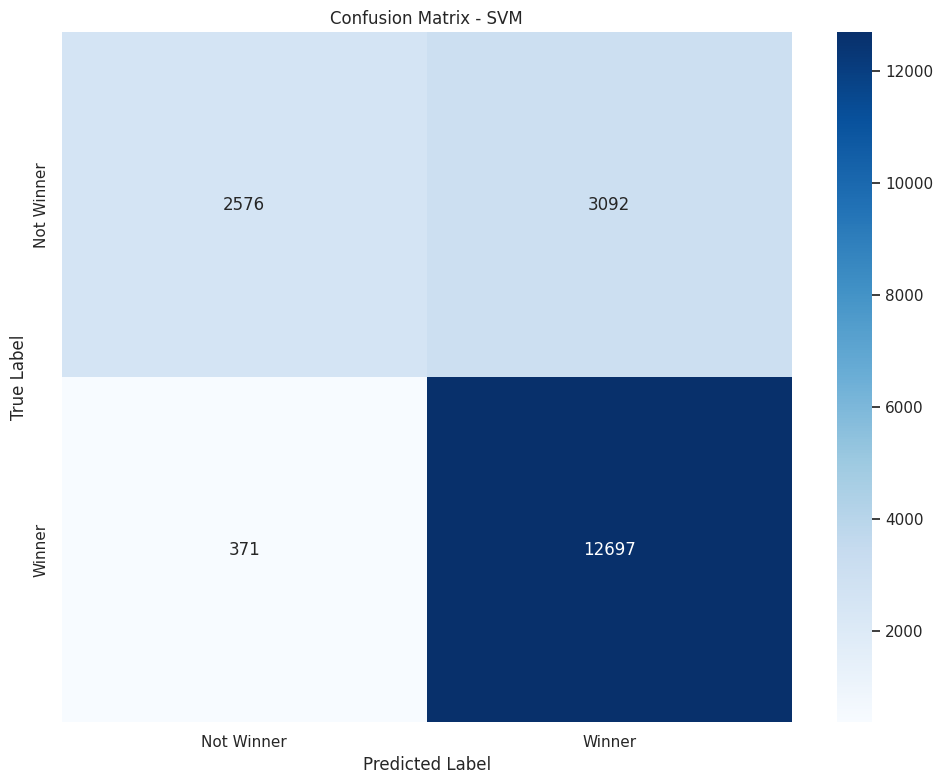

In [ ]:
#учится 45 минут, на 0.4 данных - около 6, на 0.3 - около 4.5
svm_pipeline.fit(X_train, y_train)
svm_pred = svm_pipeline.predict(X_test)
svm_proba = svm_pipeline.predict_proba(X_test)[:, 1]
evaluate_model("SVM", y_test, svm_pred, svm_proba)

3. По данным у нас есть проблема с дисбалансом классов, воспользуемся SMOTE из imbalanced-learn, чтобы попробовать это поправить

Полученные хорошие модели протестим на таких преобработанных данных

In [71]:
print(data['Победитель'].value_counts())
print(y_train.value_counts())
print(y_test.value_counts())

Победитель
1    65518
0    44357
Name: count, dtype: int64
Победитель
1    52450
0    38689
Name: count, dtype: int64


In [72]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

balanced_pipeline_knn = ImbPipeline([
    ('preprocessor', preprocessor), 
    ('smote', SMOTE(random_state=42)),  
    ('classifier', KNeighborsClassifier(n_neighbors=19, weights='distance', metric='minkowski', p = 1))
])


Balanced KNN Metrics:
Accuracy: 0.8082
Precision: 0.7977
Recall: 0.9715
F1-Score: 0.876
ROC-AUC: 0.8884

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.43      0.58      5668
           1       0.80      0.97      0.88     13068

    accuracy                           0.81     18736
   macro avg       0.83      0.70      0.73     18736
weighted avg       0.82      0.81      0.79     18736

Confusion Matrix:
[[ 2448  3220]
 [  373 12695]]


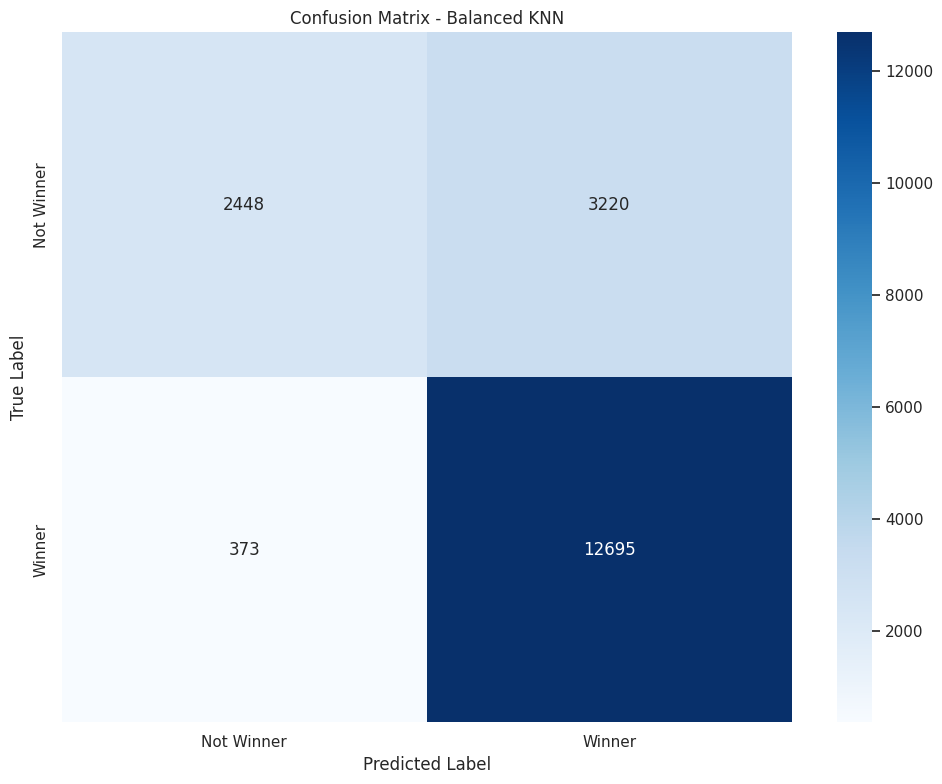

In [73]:
balanced_pipeline_knn.fit(X_train, y_train)
y_pred = balanced_pipeline_knn.predict(X_test)
y_proba = balanced_pipeline_knn.predict_proba(X_test)[:, 1]
evaluate_model("Balanced KNN", y_test, y_pred, y_proba)


Balanced KNN Metrics:
Accuracy: 0.8082
Precision: 0.7977
Recall: 0.9715
F1-Score: 0.876
ROC-AUC: 0.8886

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.43      0.58      5668
           1       0.80      0.97      0.88     13068

    accuracy                           0.81     18736
   macro avg       0.83      0.70      0.73     18736
weighted avg       0.82      0.81      0.79     18736

Confusion Matrix:
[[ 2448  3220]
 [  373 12695]]


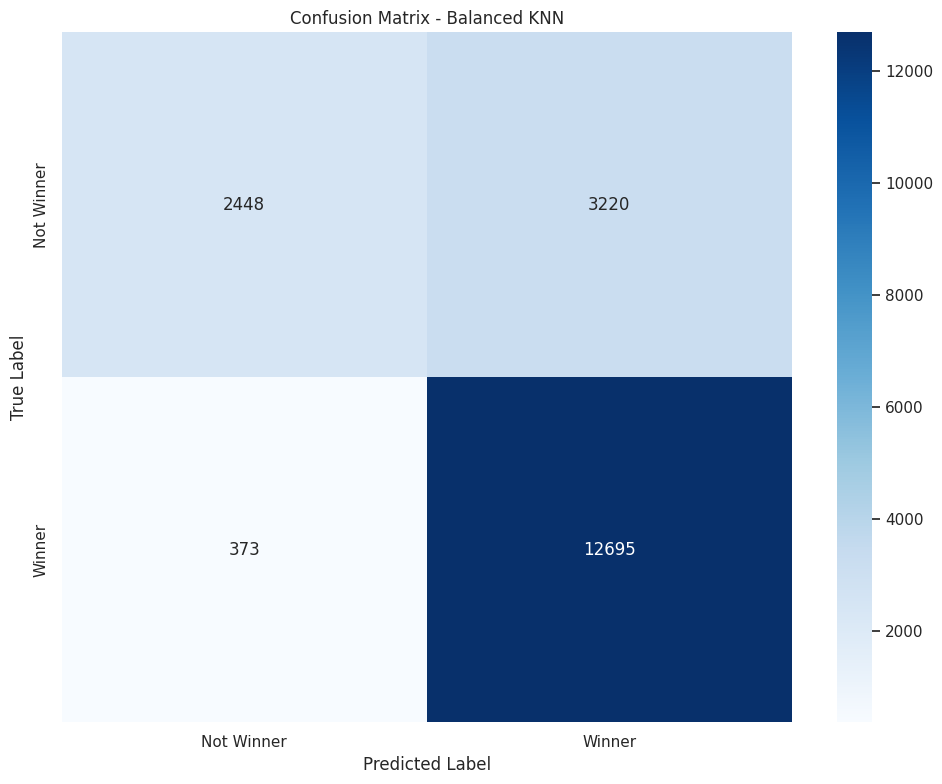

In [74]:
balanced_pipeline_knn = ImbPipeline([
    ('preprocessor', preprocessor), 
    ('smote', SMOTE(random_state=42)),  
    ('undersampler', RandomUnderSampler(random_state=42)),
    ('classifier', KNeighborsClassifier(n_neighbors=19, weights='distance', metric='minkowski', p = 1))
])
balanced_pipeline_knn.fit(X_train, y_train)
y_pred = balanced_pipeline_knn.predict(X_test)
y_proba = balanced_pipeline_knn.predict_proba(X_test)[:, 1]
evaluate_model("Balanced KNN", y_test, y_pred, y_proba)

На KNN логичным образом почти не влияет, с SVM должно быть получше

Почему не влияет на KNN: SMOTE генерирует синтетические точки минорного класса, причем между уже существующими для миноритарного класса. Метод, который он использует (интерполяция между существующими точками), может создавать артефакты (размытые границы, шум), которые негативно влияют на KNN, так как он основывается исключительно на локальной плотности и расположении конкретных точек данных

***Возможно, впоследствие можно применить более умные версии решения дисбаланса классов***

c SVM глобально требуется абсолютно критическая регуляризация (в виде С), потому что базового он все объекты относит к одной гиперплоскости - видимо, прикол в данных и в них есть аномалии

Высокий штраф за неправильную классификацию точек обучающей выборки: Модель менее терпима к точкам, попадающим внутрь разделяющей полосы или на "неправильную" сторону, становится более чувствительной к отдельным точкам данных, включая выбросы.

Последствия:

Низкое смещение (low bias): Модель хорошо подстраивается под обучающие данные

Высокая дисперсия (high variance): Существует высокий риск переобучения (overfitting). Модель может выучить шум в данных и плохо работать на новых данных

Модель может стать более сложной (особенно с нелинейными ядрами)


Balanced SVM Metrics:
Accuracy: 0.8146
Precision: 0.8034
Recall: 0.9721
F1-Score: 0.8797
ROC-AUC: 0.9467

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.45      0.60      5668
           1       0.80      0.97      0.88     13068

    accuracy                           0.81     18736
   macro avg       0.84      0.71      0.74     18736
weighted avg       0.83      0.81      0.79     18736

Confusion Matrix:
[[ 2559  3109]
 [  365 12703]]


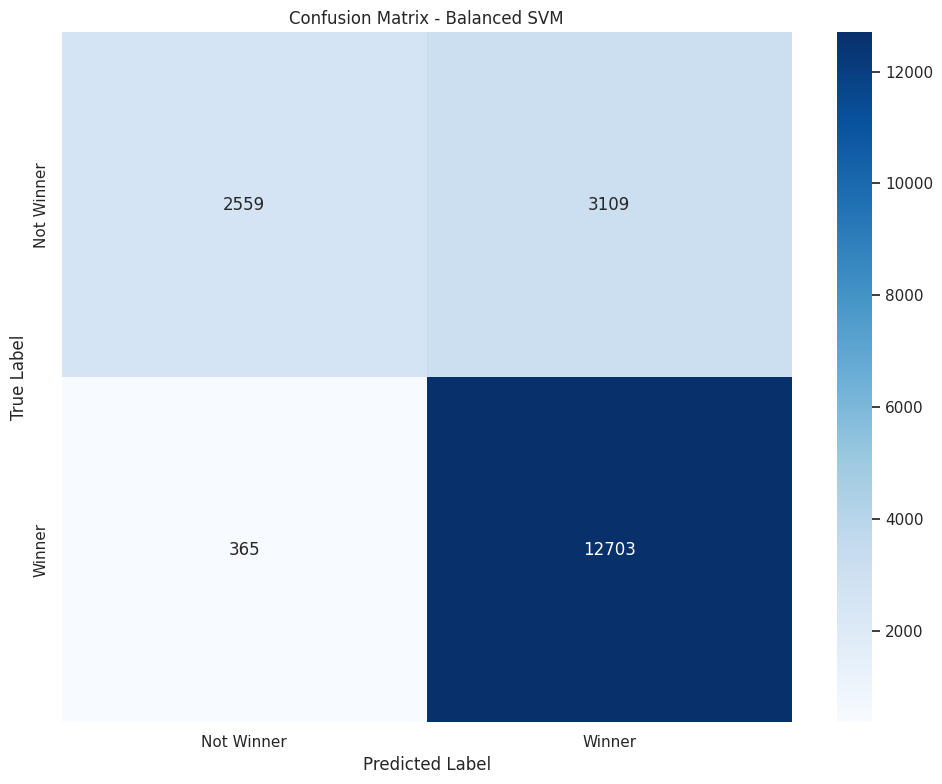

In [79]:
balanced_pipeline_svm = ImbPipeline([
    ('preprocessor', preprocessor), 
    ('smote', SMOTE(random_state=42, sampling_strategy='auto')),  # oversampling минорного класса
    ('classifier', SVC(probability=True, random_state=42, kernel='rbf', C = 100, gamma = 'scale'))
])

balanced_pipeline_svm.fit(X_train, y_train)
y_pred = balanced_pipeline_svm.predict(X_test)
y_proba = balanced_pipeline_svm.predict_proba(X_test)[:, 1]
evaluate_model("Balanced SVM", y_test, y_pred, y_proba)

4. Нейросети: MLP

In [86]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from sklearn.model_selection import train_test_split
import copy 
from typing import List, Tuple, Any, Optional
from tqdm.auto import tqdm 

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [87]:
class TenderDataset(Dataset):
    def __init__(self, X: np.ndarray, y: np.ndarray):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

    def __len__(self) -> int:
        return len(self.X)

    def __getitem__(self, idx: int) -> Tuple[torch.Tensor, torch.Tensor]:
        return self.X[idx], self.y[idx]

class TenderNet(nn.Module):
    def __init__(self, input_size: int, hidden_size1: int = 100, hidden_size2: int = 50, dropout_rate: float = 0.3):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, hidden_size1),
            nn.Tanh(),
            nn.BatchNorm1d(hidden_size1),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_size1, hidden_size2),
            nn.ReLU(),
            nn.BatchNorm1d(hidden_size2),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_size2, 1)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layers(x)

def create_weighted_sampler(y: np.ndarray) -> WeightedRandomSampler:
    if isinstance(y, torch.Tensor):
        y = y.cpu().numpy()

    class_counts = np.bincount(y.astype(int))
    if len(class_counts) < 2:
         print("Warning: Only one class present in the sample for sampler calculation.")
         class_weights = torch.ones(len(np.unique(y)), dtype=torch.float)
    elif class_counts[0] == 0 or class_counts[1] == 0:
         print(f"Warning: Class imbalance calculation error. Counts: {class_counts}")
         class_weights = torch.ones(len(class_counts), dtype=torch.float)
    else:
         class_weights = 1. / torch.tensor(class_counts, dtype=torch.float)

    sample_weights = class_weights[y.astype(int)]
    sampler = WeightedRandomSampler(
        weights=sample_weights,
        num_samples=len(sample_weights),
        replacement=True
    )
    return sampler

In [88]:
def train_model(
    X_train: np.ndarray,
    y_train: np.ndarray,
    X_val: np.ndarray,
    y_val: np.ndarray,
    preprocessor: ColumnTransformer,
    n_epochs: int = 100,
    batch_size: int = 64,
    learning_rate: float = 0.001,
    patience: int = 10,
    use_sampler: bool = True, # Параметр для использования сэмплера
    device: torch.device = device 
    ) -> nn.Module:

    print("Preprocessing data...")
    preprocessor.fit(X_train)
    X_train_processed = preprocessor.transform(X_train)
    X_val_processed = preprocessor.transform(X_val)
    input_size = X_train_processed.shape[1]
    y_train = y_train.values if hasattr(y_train, 'values') else y_train
    y_val= y_val.values if hasattr(y_val, 'values') else y_val
    print(f"Input size after preprocessing: {input_size}")

    train_dataset = TenderDataset(X_train_processed, y_train)
    val_dataset = TenderDataset(X_val_processed, y_val)
    sampler: Optional[WeightedRandomSampler] = None 
    shuffle: bool = True 
    if use_sampler:
        print("Creating weighted sampler...")
        try: 
            sampler = create_weighted_sampler(y_train)
            shuffle = False 
            print("Weighted sampler created successfully.")
        except Exception as e:
            print(f"Error creating weighted sampler: {e}. Proceeding without sampler.")
            sampler = None
            shuffle = True
    else:
        print("Weighted sampler is disabled.")

    train_loader = DataLoader(
        train_dataset, batch_size=batch_size, sampler=sampler, shuffle=shuffle,
        num_workers=0,
        pin_memory=True if device == torch.device("cuda") else False
    )
    val_loader = DataLoader(
        val_dataset, batch_size=batch_size * 2, shuffle=False,
        num_workers=0,
        pin_memory=True if device == torch.device("cuda") else False
    )

    model = TenderNet(input_size=input_size).to(device)
    criterion = nn.BCEWithLogitsLoss() # `pos_weight` можно использовать здесь как альтернативу сэмплеру
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=patience // 2, factor=0.1, verbose=False) # Убрали verbose

    best_val_loss = float('inf')
    epochs_no_improve = 0
    best_model_state = None

    print("Starting training...")
    epochs_pbar = tqdm(range(n_epochs), desc="Epoch Progress")
    for epoch in epochs_pbar:
        model.train()
        running_loss = 0.0
        train_pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{n_epochs} [Train]", leave=False)
        for inputs, labels in train_pbar:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            train_pbar.set_postfix(loss=running_loss / (train_pbar.n + 1)) # train_pbar.n - количество итераций

        avg_train_loss = running_loss / len(train_loader)

        model.eval()
        val_loss = 0.0
        val_pbar = tqdm(val_loader, desc=f"Epoch {epoch+1}/{n_epochs} [Val]", leave=False)
        with torch.no_grad():
            for inputs, labels in val_pbar:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                val_pbar.set_postfix(loss=val_loss / (val_pbar.n + 1))

        avg_val_loss = val_loss / len(val_loader)


        epochs_pbar.set_postfix(TrainLoss=f"{avg_train_loss:.4f}", ValLoss=f"{avg_val_loss:.4f}")

        scheduler.step(avg_val_loss)

        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            epochs_no_improve = 0
            best_model_state = copy.deepcopy(model.state_dict())
        else:
            epochs_no_improve += 1

        if epochs_no_improve >= patience:
            print(f"\nEarly stopping triggered after {epoch+1} epochs.")
            epochs_pbar.close() 
            train_pbar.close()
            val_pbar.close()
            break

    if best_model_state:
        print(f"\nLoading best model state with Val Loss: {best_val_loss:.4f}")
        model.load_state_dict(best_model_state)
    else:
        print("\nWarning: No best model state was saved. Returning last state.")

    return model

In [89]:
def predict_proba(model: nn.Module, X: np.ndarray, preprocessor: ColumnTransformer, device: torch.device, batch_size: int = 256) -> np.ndarray:
    X_processed = preprocessor.transform(X)
    pred_dataset = torch.utils.data.TensorDataset(torch.tensor(X_processed, dtype=torch.float32))
    pred_loader = DataLoader(pred_dataset, batch_size=batch_size, shuffle=False)
    pred_pbar = tqdm(pred_loader, desc="Predicting")

    model.eval()
    all_probabilities = []
    with torch.no_grad():
        for batch in pred_pbar:
            inputs = batch[0].to(device)
            logits = model(inputs)
            probabilities = torch.sigmoid(logits)
            all_probabilities.append(probabilities.cpu().numpy())

    all_probabilities = np.concatenate(all_probabilities, axis=0)
    return all_probabilities.squeeze()

Preprocessing data...
Input size after preprocessing: 6715
Creating weighted sampler...
Weighted sampler created successfully.
Starting training...


/Users/polina/Desktop/b2b project/.venv/lib/python3.13/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch Progress:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1/50 [Train]:   0%|          | 0/1140 [00:00<?, ?it/s]

Epoch 1/50 [Val]:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 2/50 [Train]:   0%|          | 0/1140 [00:00<?, ?it/s]

Epoch 2/50 [Val]:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 3/50 [Train]:   0%|          | 0/1140 [00:00<?, ?it/s]

Epoch 3/50 [Val]:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 4/50 [Train]:   0%|          | 0/1140 [00:00<?, ?it/s]

Epoch 4/50 [Val]:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 5/50 [Train]:   0%|          | 0/1140 [00:00<?, ?it/s]

Epoch 5/50 [Val]:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 6/50 [Train]:   0%|          | 0/1140 [00:00<?, ?it/s]

Epoch 6/50 [Val]:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 7/50 [Train]:   0%|          | 0/1140 [00:00<?, ?it/s]

Epoch 7/50 [Val]:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 8/50 [Train]:   0%|          | 0/1140 [00:00<?, ?it/s]

Epoch 8/50 [Val]:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 9/50 [Train]:   0%|          | 0/1140 [00:00<?, ?it/s]

Epoch 9/50 [Val]:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 10/50 [Train]:   0%|          | 0/1140 [00:00<?, ?it/s]

Epoch 10/50 [Val]:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 11/50 [Train]:   0%|          | 0/1140 [00:00<?, ?it/s]

Epoch 11/50 [Val]:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 12/50 [Train]:   0%|          | 0/1140 [00:00<?, ?it/s]

Epoch 12/50 [Val]:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 13/50 [Train]:   0%|          | 0/1140 [00:00<?, ?it/s]

Epoch 13/50 [Val]:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 14/50 [Train]:   0%|          | 0/1140 [00:00<?, ?it/s]

Epoch 14/50 [Val]:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 15/50 [Train]:   0%|          | 0/1140 [00:00<?, ?it/s]

Epoch 15/50 [Val]:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 16/50 [Train]:   0%|          | 0/1140 [00:00<?, ?it/s]

Epoch 16/50 [Val]:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 17/50 [Train]:   0%|          | 0/1140 [00:00<?, ?it/s]

Epoch 17/50 [Val]:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 18/50 [Train]:   0%|          | 0/1140 [00:00<?, ?it/s]

Epoch 18/50 [Val]:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 19/50 [Train]:   0%|          | 0/1140 [00:00<?, ?it/s]

Epoch 19/50 [Val]:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 20/50 [Train]:   0%|          | 0/1140 [00:00<?, ?it/s]

Epoch 20/50 [Val]:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 21/50 [Train]:   0%|          | 0/1140 [00:00<?, ?it/s]

Epoch 21/50 [Val]:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 22/50 [Train]:   0%|          | 0/1140 [00:00<?, ?it/s]

Epoch 22/50 [Val]:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 23/50 [Train]:   0%|          | 0/1140 [00:00<?, ?it/s]

Epoch 23/50 [Val]:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 24/50 [Train]:   0%|          | 0/1140 [00:00<?, ?it/s]

Epoch 24/50 [Val]:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 25/50 [Train]:   0%|          | 0/1140 [00:00<?, ?it/s]

Epoch 25/50 [Val]:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 26/50 [Train]:   0%|          | 0/1140 [00:00<?, ?it/s]

Epoch 26/50 [Val]:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 27/50 [Train]:   0%|          | 0/1140 [00:00<?, ?it/s]

Epoch 27/50 [Val]:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 28/50 [Train]:   0%|          | 0/1140 [00:00<?, ?it/s]

Epoch 28/50 [Val]:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 29/50 [Train]:   0%|          | 0/1140 [00:00<?, ?it/s]

Epoch 29/50 [Val]:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 30/50 [Train]:   0%|          | 0/1140 [00:00<?, ?it/s]

Epoch 30/50 [Val]:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 31/50 [Train]:   0%|          | 0/1140 [00:00<?, ?it/s]

Epoch 31/50 [Val]:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 32/50 [Train]:   0%|          | 0/1140 [00:00<?, ?it/s]

Epoch 32/50 [Val]:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 33/50 [Train]:   0%|          | 0/1140 [00:00<?, ?it/s]

Epoch 33/50 [Val]:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 34/50 [Train]:   0%|          | 0/1140 [00:00<?, ?it/s]

Epoch 34/50 [Val]:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 35/50 [Train]:   0%|          | 0/1140 [00:00<?, ?it/s]

Epoch 35/50 [Val]:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 36/50 [Train]:   0%|          | 0/1140 [00:00<?, ?it/s]

Epoch 36/50 [Val]:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 37/50 [Train]:   0%|          | 0/1140 [00:00<?, ?it/s]

Epoch 37/50 [Val]:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 38/50 [Train]:   0%|          | 0/1140 [00:00<?, ?it/s]

Epoch 38/50 [Val]:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 39/50 [Train]:   0%|          | 0/1140 [00:00<?, ?it/s]

Epoch 39/50 [Val]:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 40/50 [Train]:   0%|          | 0/1140 [00:00<?, ?it/s]

Epoch 40/50 [Val]:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 41/50 [Train]:   0%|          | 0/1140 [00:00<?, ?it/s]

Epoch 41/50 [Val]:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 42/50 [Train]:   0%|          | 0/1140 [00:00<?, ?it/s]

Epoch 42/50 [Val]:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 43/50 [Train]:   0%|          | 0/1140 [00:00<?, ?it/s]

Epoch 43/50 [Val]:   0%|          | 0/143 [00:00<?, ?it/s]

Epoch 44/50 [Train]:   0%|          | 0/1140 [00:00<?, ?it/s]

Epoch 44/50 [Val]:   0%|          | 0/143 [00:00<?, ?it/s]


Early stopping triggered after 44 epochs.

Loading best model state with Val Loss: 0.1061
Preprocessing data for prediction...


Predicting:   0%|          | 0/74 [00:00<?, ?it/s]


MLP Metrics:
Accuracy: 0.8304
Precision: 0.815
Recall: 0.9791
F1-Score: 0.8895
ROC-AUC: 0.9533

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.49      0.63      5668
           1       0.81      0.98      0.89     13068

    accuracy                           0.83     18736
   macro avg       0.86      0.73      0.76     18736
weighted avg       0.84      0.83      0.81     18736

Confusion Matrix:
[[ 2763  2905]
 [  273 12795]]


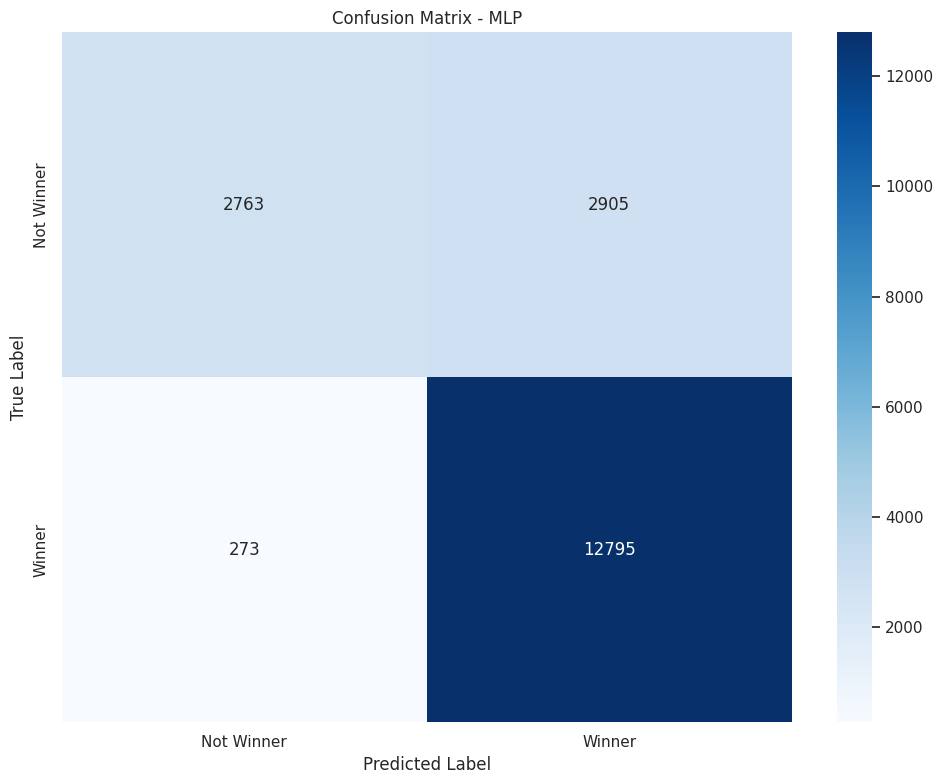

In [91]:
num_features = ["avg_price_drop", "Стоимость(руб.) Заказчик", "Снижение на торгах,%"]
cat_features = ["Сфера деятельности", "Регион поставки", "Город поставки", "Форма публикации", "Тип торгов"]
passthrough_features = [
    "Статус допуска", "РНП ранее", "is_january", "publication_peak_9_11",
    "app_end_noon_12", "app_start_night_12", "trade_end_night_12",
    "days_between", 'year', 'month','win_rate', 'region_wins',
    'region_win_rate', 'customer_wins', 'customer_win_rate', 'sphere_wins',
    'sphere_win_rate', 'total_wins', 'recent_activity_ratio',
    'competitors_per_tender', 'avg_competitors_in_region',
    'avg_competitors_in_sphere', 'avg_competitors_in_customer'
]


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_features),
        ('pass', 'passthrough', passthrough_features)
    ],
    remainder='drop'
)


X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

trained_model = train_model(
    X_train=X_train_split,
    y_train=y_train_split,
    X_val=X_val_split,
    y_val=y_val_split,
    preprocessor=preprocessor,
    n_epochs=50,
    patience=10,
    use_sampler=True, 
    device=device
)

y_proba = predict_proba(trained_model, X_test, preprocessor, device)
y_pred = (y_proba > 0.5).astype(int)
evaluate_model("MLP", y_test, y_pred, y_proba)

In [93]:
from sklearn.base import BaseEstimator, ClassifierMixin

class PyTorchSklearnWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model, device):
        self.model = model
        self.device = device
        self.classes_ = np.array([0, 1])
        self.model.to(self.device)
        self.model.eval()

    def fit(self, X, y=None):
        return self

    def predict_proba(self, X):
        self.model.eval() 
        all_probabilities = []
        pred_dataset = torch.utils.data.TensorDataset(torch.tensor(X, dtype=torch.float32))
        pred_loader = DataLoader(pred_dataset, batch_size=256, shuffle=False)

        with torch.no_grad():
            for batch in pred_loader: 
                inputs = batch[0].to(self.device)
                logits = self.model(inputs)
                probabilities_pos = torch.sigmoid(logits)
                probabilities_pos_np = probabilities_pos.cpu().numpy()
                # Вероятность класса 0 = 1 - вероятность класса 1
                probabilities_neg_np = 1.0 - probabilities_pos_np
                batch_probs = np.hstack((probabilities_neg_np, probabilities_pos_np))
                all_probabilities.append(batch_probs)


        all_probabilities = np.concatenate(all_probabilities, axis=0)
        return all_probabilities

    def predict(self, X):
        probabilities = self.predict_proba(X)
        return np.argmax(probabilities, axis=1)


sklearn_estimator = PyTorchSklearnWrapper(trained_model, device)
X_val_processed = preprocessor.transform(X_val_split)
y_val_np = y_val_split.values if hasattr(y_val_split, 'values') else y_val_split


feature_names_processed = preprocessor.get_feature_names_out()
print(f"{len(feature_names_processed)} feature names after preprocessing.")

print("Calculating permutation importance using wrapper...")
result = permutation_importance(
    estimator=sklearn_estimator,      
    X=X_val_processed,          
    y=y_val_np,
    scoring='f1',             
    #scoring=make_scorer(lambda est, x, y: f1_score(y, est.predict(x)))
    n_repeats=1,                 
    random_state=42
)

perm_importance_df = pd.DataFrame(
    {'feature': feature_names_processed,
     'importance_mean': result.importances_mean,
     'importance_std': result.importances_std}
).sort_values('importance_mean', ascending=False)

print("\n--- Permutation Importance (Top 20) ---")
print(perm_importance_df.head(20))
#примерно полтора часа

6715 feature names after preprocessing.
Calculating permutation importance using wrapper...

--- Permutation Importance (Top 20) ---
                                                feature  importance_mean  \
6708                              pass__sphere_win_rate             0.17   
6706                            pass__customer_win_rate             0.16   
6705                                pass__customer_wins             0.01   
6687                         cat__Тип торгов_Неизвестно             0.01   
6703                                  pass__region_wins             0.01   
6702                                     pass__win_rate             0.00   
6673  cat__Тип торгов_Закупка у единственного постав...             0.00   
6672                cat__Тип торгов_Аукцион электронный             0.00   
3958  cat__Сфера деятельности_[ОКПД2 42.21] Сооружен...             0.00   
6692                               pass__Статус допуска             0.00   
6711                       pass

/var/folders/7_/sz_ftshd1b1b9sppxlm9vj9m0000gn/T/ipykernel_25093/3561367101.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


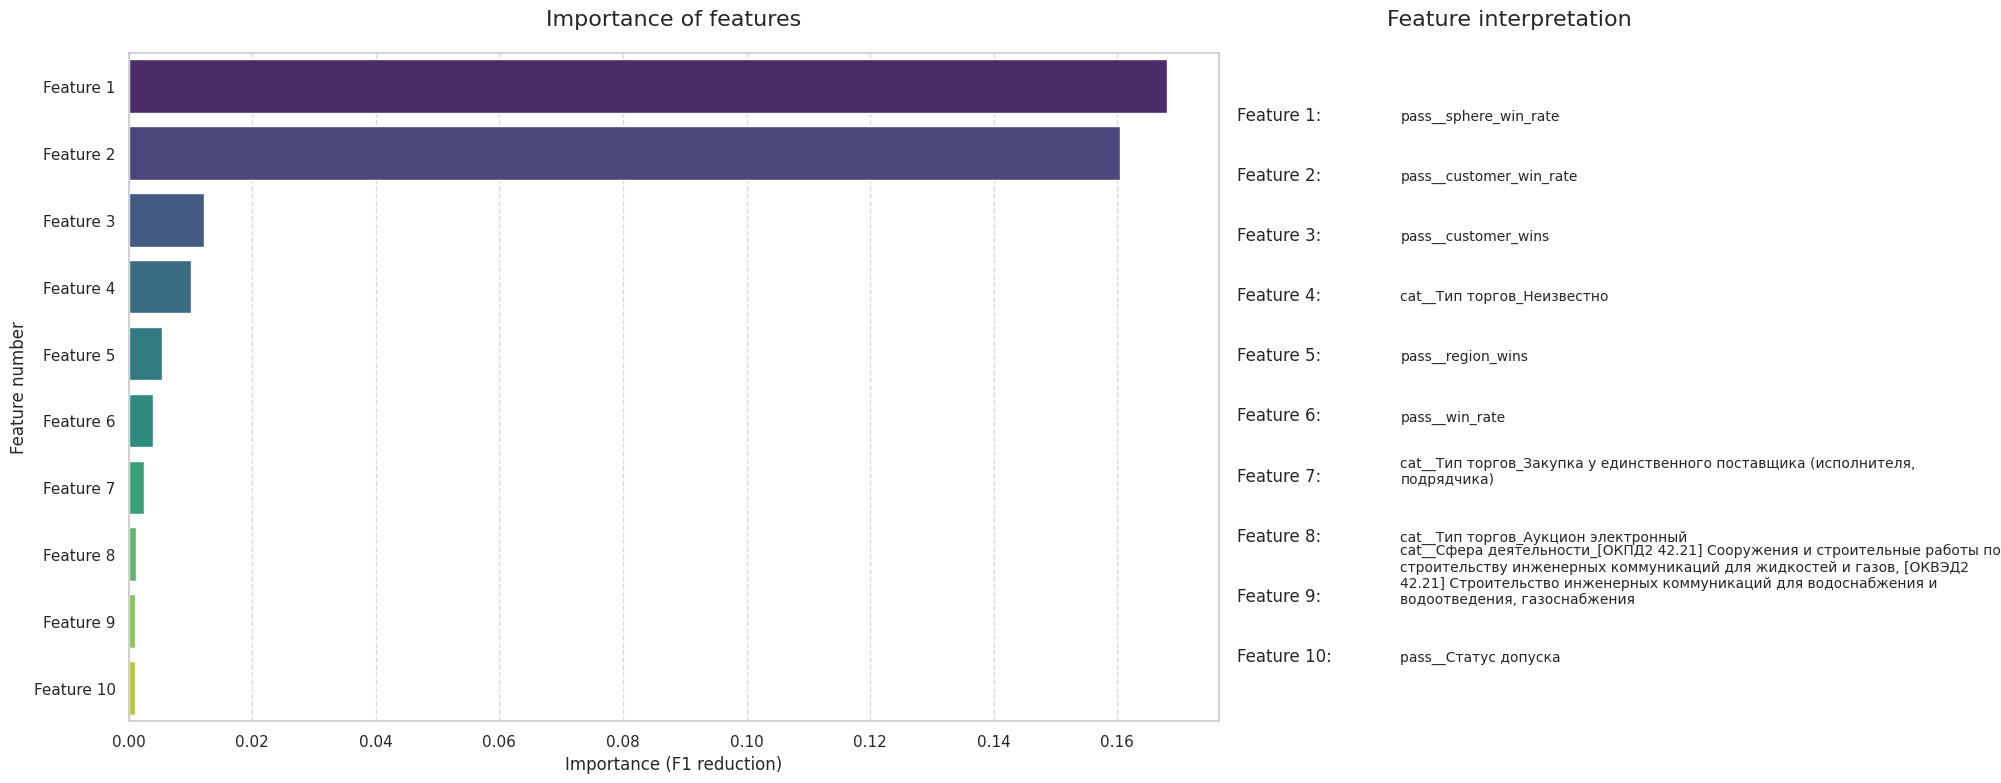

In [105]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), gridspec_kw={'width_ratios': [2, 1]})
top_n = 10
perm_importance_df_top = perm_importance_df.head(top_n)
feature_names = [f'Feature {i+1}' for i in range(len(perm_importance_df_top))]

sns.barplot(
    x='importance_mean',
    y=feature_names,
    data=perm_importance_df_top,
    palette='viridis',
    errorbar='se',
    capsize=5,
    ax=ax1
)

ax1.set_title('Importance of features', fontsize=16, pad=20)
ax1.set_xlabel('Importance (F1 reduction)', fontsize=12)
ax1.set_ylabel('Feature number', fontsize=12)
ax1.grid(True, axis='x', linestyle='--', alpha=0.7)
ax2.axis('off')
ax2.set_title('Feature interpretation', fontsize=16, pad=20)
for i, (name, feature) in enumerate(zip(feature_names, perm_importance_df_top['feature'])):
    ax2.text(0, 0.9 - i*0.09, f'{name}:', fontsize=12)
    ax2.text(0.3, 0.9 - i*0.09, feature, fontsize=10, wrap=True)

plt.tight_layout()
plt.show()

такие результаты еще и из-за того, что я установила n_repeats=1, то есть каждая фича изменяется только один раз для оценки ее влияния на f1_score - по идее конечно надо бы больше, но не было времени столько ждать сейчас 

***Можно получить результаты лучше (и быстрее), если сначала, например, по Lasso или по деревьям (LightGBM, XGBoost) вытащить важность признаков, чтобы отобрать топ N признаков перед обучением MLP или перед расчетом важности для MLP***

Еще можно вместо One-Hot Encoding для категориальных признаков с большим количеством уникальных значений использовать
Embedding слои в нейронной сети, сильно уменьшит количество входных признаков

_______________________________________________________________________________________________________________________________

**Второй этап: непосредственно рекомендации для нового тендера**

Сначала определим создание пула поставщиков по обучающим данным (я возьму до 2023 года), а новый тендер будем брать из теста по 2024 и 2025 году, то есть как и было сделано ранее (потому что до этого заполняла пропуски в 2024 и 2025 через ближайших соседей, хотя потенциально можно тут использовать и фулл исторические данные, пока не знаю)

In [107]:
required_columns = [
    'ИНН поставщика', 'Победитель', 'Регион поставки', 'Сфера деятельности',
    'ИНН заказчика', 'Стоимость(руб.) Заказчик', 'Снижение на торгах,%',
    'Дата публикации', 'РНП ранее', 'win_rate', 'region_wins', 'region_win_rate',
    'customer_wins', 'customer_win_rate', 'sphere_wins', 'sphere_win_rate',
    'total_wins', 'recent_activity_ratio'
]

missing_cols = [col for col in required_columns if col not in data.columns]
if missing_cols:
    raise ValueError(f"Отсутствуют столбцы: {missing_cols}")

In [113]:
new_data = data[data['year'] < 2024]
new_data['is_winner'] = (new_data['Победитель'] == 1).astype(int)
# Сортируем, чтобы брать данные из последней по времени записи
new_data = new_data.sort_values(by=['ИНН поставщика', 'Дата публикации'], ascending=[True, True])

aggregations = {
    'total_participations': ('ИНН поставщика', 'size'), 
    'total_wins_calculated': ('is_winner', 'sum'),   
    'first_participation_date': ('Дата публикации', 'min'), 
    'last_participation_date': ('Дата публикации', 'max'),  
    'regions_set': ('Регион поставки', lambda x: set(x.dropna())), 
    'spheres_set': ('Сфера деятельности', lambda x: set(x.dropna())),
    'customers_set': ('ИНН заказчика', lambda x: set(x.dropna())),  
    # показатели по ВЫИГРАННЫМ тендерам
    'avg_price_drop_won': ('Снижение на торгах,%',
                           lambda x: x[new_data.loc[x.index, 'is_winner'] == 1].mean()),
    'avg_tender_value_won': ('Стоимость(руб.) Заказчик',
                             lambda x: x[new_data.loc[x.index, 'is_winner'] == 1].mean()),
    #последние известные значения признаков для поставщика
    'win_rate_last': ('win_rate', 'last'),
    'region_wins_last': ('region_wins', 'last'),
    'region_win_rate_last': ('region_win_rate', 'last'),
    'customer_wins_last': ('customer_wins', 'last'),
    'customer_win_rate_last': ('customer_win_rate', 'last'),
    'sphere_wins_last': ('sphere_wins', 'last'),
    'sphere_win_rate_last': ('sphere_win_rate', 'last'),
    'total_wins_last': ('total_wins', 'last'), 
    'recent_activity_ratio_last': ('recent_activity_ratio', 'last'),
    'rnp_status_last': ('РНП ранее', 'last')
}

supplier_profiles = new_data.groupby('ИНН поставщика').agg(**aggregations).reset_index()

print(f"\n Создано {supplier_profiles.shape[0]} уникальных профилей поставщиков")
print(f"Всего уникальных поставщиков: {new_data['ИНН поставщика'].nunique()}")

/var/folders/7_/sz_ftshd1b1b9sppxlm9vj9m0000gn/T/ipykernel_25093/1103601927.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['is_winner'] = (new_data['Победитель'] == 1).astype(int)



 Создано 41047 уникальных профилей поставщиков
Всего уникальных поставщиков: 41047


In [114]:
# Рассчитаем win_rate на основе посчитанных побед и участий
# Это может быть точнее, чем брать 'last', если 'win_rate' в data менялся
supplier_profiles['win_rate_calculated'] = (
    supplier_profiles['total_wins_calculated'] / supplier_profiles['total_participations']
).fillna(0) # (если 0 участий -> 0 побед -> win_rate 0)

#где не было побед (могут быть NaN)
supplier_profiles['avg_price_drop_won'] = supplier_profiles['avg_price_drop_won'].fillna(0)
supplier_profiles['avg_tender_value_won'] = supplier_profiles['avg_tender_value_won'].fillna(0)
supplier_profiles['rnp_status_numeric'] = supplier_profiles['rnp_status_last'].apply(
    lambda x: 1 if pd.notna(x) and x != 0 else 0 
)

# используем сравнение посчитанных побед с 'последними' победами из данных (кривые ручки были и не сошлось сначала)
wins_comparison = (supplier_profiles['total_wins_calculated'] != supplier_profiles['total_wins_last'])
if wins_comparison.any():
    print(f"Посчитанное число побед ('total_wins_calculated') отличается от 'total_wins_last' для {wins_comparison.sum()} поставщиков")

In [116]:
supplier_profiles = supplier_profiles.rename(columns={
    'total_wins_calculated': 'total_wins',
    'win_rate_calculated': 'win_rate',
    'rnp_status_numeric': 'РНП ранее' 
})
columns_to_drop = [
    'total_wins_last', 'win_rate_last', 'rnp_status_last', 
]
columns_to_drop_existing = [col for col in columns_to_drop if col in supplier_profiles.columns]
supplier_profiles = supplier_profiles.drop(columns=columns_to_drop_existing)
supplier_profiles['regions_list'] = supplier_profiles['regions_set'].apply(list)
supplier_profiles['spheres_list'] = supplier_profiles['spheres_set'].apply(list)
supplier_profiles['customers_list'] = supplier_profiles['customers_set'].apply(list)
supplier_profiles.head(10)

,ИНН поставщика,total_participations,total_wins,first_participation_date,last_participation_date,regions_set,spheres_set,customers_set,avg_price_drop_won,avg_tender_value_won,...,customer_wins_last,customer_win_rate_last,sphere_wins_last,sphere_win_rate_last,recent_activity_ratio_last,win_rate,РНП ранее,regions_list,spheres_list,customers_list
0,101010245,2,2,2020-01-14 10:49:46,2020-01-20 10:10:07,{Краснодарский край},"{[ОКПД2 80.10] Услуги охранных служб, в том чи...","{2343014700, 2345008558}",0.22,"457,906.08",...,1.00,1.00,2.00,1.00,0.00,1.00,0,[Краснодарский край],"[[ОКПД2 80.10] Услуги охранных служб, в том чи...","[2343014700, 2345008558]"
1,101980148,4,2,2020-01-17 13:03:11,2020-01-21 17:16:28,{Краснодарский край},{[ОКПД2 85.31] Услуги по профессиональному обу...,"{2356040433, 2336014682, 2330027935}",0.15,"127,509.98",...,0.00,0.00,2.00,0.50,0.00,0.50,0,[Краснодарский край],[[ОКПД2 85.31] Услуги по профессиональному обу...,"[2356040433, 2336014682, 2330027935]"
2,103007142,2,0,2020-01-20 15:42:29,2020-01-22 11:16:15,{Республика Адыгея (Адыгея)},{[ОКПД2 43.99] Работы строительные специализир...,{101005502},0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0,[Республика Адыгея (Адыгея)],[[ОКПД2 43.99] Работы строительные специализир...,[101005502]
3,104013340,6,0,2020-01-20 09:19:44,2021-03-10 18:31:01,"{Краснодарский край, Республика Адыгея (Адыгея)}",{[ОКПД2 43.12] Работы по подготовке строительн...,"{105022178, 2339015187, 2345008283, 101005502}",0.00,0.00,...,0.00,0.00,0.00,0.00,0.17,0.00,0,"[Краснодарский край, Республика Адыгея (Адыгея)]",[[ОКПД2 43.12] Работы по подготовке строительн...,"[105022178, 2339015187, 2345008283, 101005502]"
4,105003062,1,1,2020-01-15 15:23:21,2020-01-15 15:23:21,{Республика Адыгея (Адыгея)},{[ОКПД2 42.21] Сооружения и строительные работ...,{104011222},0.17,"2,825,250.00",...,1.00,1.00,1.00,1.00,0.00,1.00,0,[Республика Адыгея (Адыгея)],[[ОКПД2 42.21] Сооружения и строительные работ...,[104011222]
5,105004524,1,0,2020-01-16 09:42:48,2020-01-16 09:42:48,{Ростовская область},{[ОКПД2 17.23] Принадлежности канцелярские бум...,{6147004118},0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0,[Ростовская область],[[ОКПД2 17.23] Принадлежности канцелярские бум...,[6147004118]
6,105015580,1,1,2020-03-10 14:42:18,2020-03-10 14:42:18,{Республика Адыгея (Адыгея)},{[ОКПД2 71.12] Услуги в области инженерно-техн...,{2312054894},0.00,"1,368,522.00",...,1.00,1.00,1.00,1.00,0.00,1.00,0,[Республика Адыгея (Адыгея)],[[ОКПД2 71.12] Услуги в области инженерно-техн...,[2312054894]
7,105021223,1,0,2020-01-16 17:43:06,2020-01-16 17:43:06,{Республика Адыгея (Адыгея)},"{[ОКПД2 28.23] Машины офисные и оборудование, ...",{105018326},0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0,[Республика Адыгея (Адыгея)],"[[ОКПД2 28.23] Машины офисные и оборудование, ...",[105018326]
8,105036533,1,0,2020-01-22 11:16:15,2020-01-22 11:16:15,{Республика Адыгея (Адыгея)},{[ОКПД2 43.99] Работы строительные специализир...,{101005502},0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0,[Республика Адыгея (Адыгея)],[[ОКПД2 43.99] Работы строительные специализир...,[101005502]
9,105052990,1,0,2020-01-16 15:45:49,2020-01-16 15:45:49,{Ставропольский край},{[ОКПД2 43.21] Работы электромонтажные},{2634063910},0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0,[Ставропольский край],[[ОКПД2 43.21] Работы электромонтажные],[2634063910]


In [118]:
print("Столбцы профилей:")
print(supplier_profiles.columns.tolist())

Столбцы профилей:
['ИНН поставщика', 'total_participations', 'total_wins', 'first_participation_date', 'last_participation_date', 'regions_set', 'spheres_set', 'customers_set', 'avg_price_drop_won', 'avg_tender_value_won', 'region_wins_last', 'region_win_rate_last', 'customer_wins_last', 'customer_win_rate_last', 'sphere_wins_last', 'sphere_win_rate_last', 'recent_activity_ratio_last', 'win_rate', 'РНП ранее', 'regions_list', 'spheres_list', 'customers_list']


Теперь попробуем применить наши модели, взяв новые тендеры из теста

In [122]:
testing_data = data[data['year'] >= 2024]

Для "новых" тендеров мы знаем только информацию о самих тендерах: используем только ее и удалим лишнее

In [124]:
testing_data = testing_data.drop(columns=[ 'РНП ранее',
 'year',
 'month',
 'win_rate',
 'region_wins',
 'region_win_rate',
 'customer_wins',
 'customer_win_rate',
 'sphere_wins',
 'sphere_win_rate',
 'total_wins',
 'avg_price_drop',
 'last_activity_date',
 'recent_activity_ratio',
 'competitors_per_tender',
 'avg_competitors_in_region',
 'avg_competitors_in_sphere',
 'avg_competitors_in_customer',
 'is_january',
 'days_between',
 'publication_peak_9_11',
 'app_end_noon_12',
 'app_start_night_12',
 'trade_end_night_12',
 'is_winner'])

Так как пока умеем работать только с существующими компаниями, выберем тендер из тестовых данных, в котором все участники (и победитель) присутствовали в обучающей выборке

In [127]:
train_companies = set(new_data['ИНН поставщика'].unique())

def get_company_train_stats(inn):
    train_records = new_data[new_data['ИНН поставщика'] == inn]
    return {
        'records_count': len(train_records),
        'wins_count': train_records['Победитель'].sum()
    }


valid_tenders = []
for tender_id in testing_data['Реестровый номер публикации'].unique():
    tender_data = testing_data[testing_data['Реестровый номер публикации'] == tender_id]
    participants = tender_data['ИНН поставщика'].unique()
    
    if all(inn in train_companies for inn in participants):
        winner_inn = tender_data[tender_data['Победитель'] == 1]['ИНН поставщика'].iloc[0]
        valid_tenders.append({
            'tender_id': tender_id,
            'participants_count': len(participants),
            'winner_inn': winner_inn
        })

if valid_tenders:
    selected_tender = max(valid_tenders, key=lambda x: x['participants_count'])
    tender_data = testing_data[testing_data['Реестровый номер публикации'] == selected_tender['tender_id']].copy()
    
    print("\nВыбран тендер:")
    print(f"ID: {selected_tender['tender_id']}")
    print(f"Количество участников: {selected_tender['participants_count']}")
    
    print("\nИнформация об участниках:")
    for _, participant in tender_data.iterrows():
        inn = participant['ИНН поставщика']
        stats = get_company_train_stats(inn)
        
        print(f"{'ПОБЕДИТЕЛЬ' if participant['Победитель'] == 1 else 'Участник'}")
        print(f"ИНН: {inn}")
        print(f"Количество участий в тендерах (в обучающей выборке): {stats['records_count']}")
        print(f"Количество побед (в обучающей выборке): {stats['wins_count']}")
        print("-" * 60)
    selected_tender_full = tender_data
else:
    print("Не найдено подходящих тендеров")


Выбран тендер:
ID: 3568270
Количество участников: 9

Информация об участниках:
Участник
ИНН: 264080182
Количество участий в тендерах (в обучающей выборке): 25
Количество побед (в обучающей выборке): 7
------------------------------------------------------------
Участник
ИНН: 2130130653
Количество участий в тендерах (в обучающей выборке): 134
Количество побед (в обучающей выборке): 9
------------------------------------------------------------
ПОБЕДИТЕЛЬ
ИНН: 5009096659
Количество участий в тендерах (в обучающей выборке): 4
Количество побед (в обучающей выборке): 2
------------------------------------------------------------
Участник
ИНН: 5609040457
Количество участий в тендерах (в обучающей выборке): 53
Количество побед (в обучающей выборке): 17
------------------------------------------------------------
Участник
ИНН: 5902872506
Количество участий в тендерах (в обучающей выборке): 31
Количество побед (в обучающей выборке): 9
-----------------------------------------------------------

In [139]:
print(testing_data[testing_data['Реестровый номер публикации'] == 3568270])

       Уровень   Заказчик  ИНН заказчика  Стоимость(руб.) Заказчик  \
51857        2  АО "БЭСК"      276143694              1,830,000.00   
43892        2  АО "БЭСК"      276143694              1,830,000.00   
7905         2  АО "БЭСК"      276143694              1,830,000.00   
47602        2  АО "БЭСК"      276143694              1,830,000.00   
98303        2  АО "БЭСК"      276143694              1,830,000.00   
92997        2  АО "БЭСК"      276143694              1,830,000.00   
32206        2  АО "БЭСК"      276143694              1,830,000.00   
80421        2  АО "БЭСК"      276143694              1,830,000.00   
1211         2  АО "БЭСК"      276143694              1,830,000.00   

       Реестровый номер публикации  \
51857                      3568270   
43892                      3568270   
7905                       3568270   
47602                      3568270   
98303                      3568270   
92997                      3568270   
32206                      356827

In [140]:
new_tender_info = {
    'Регион поставки': 'Республика Башкортостан',
    'Город поставки': 'Уфа',
    'Сфера деятельности': '[ОКПД2 27.32] Провода и кабели электронные и электрические прочие, [ОКВЭД2 25.11] Производство строительных металлических конструкций, изделий и их частей', 
    'Заказчик': 'АО "БЭСК"',
    'ИНН заказчика': '276143694', 
    'Стоимость(руб.) Заказчик': 1830000.00, 
    'Дата публикации': '2024-02-08 10:02:15',
    'Дата окончания приема заявок / Дата планового окончания исполнения контракта / Плановая дата публикации лота по ППГ': '2024-02-15 11:25:16',
    'Дата начала подачи заявок / Дата начала исполнения контракта / Дата публикации ППГ':'2024-02-08 10:02:15',
    'Дата окончания проведения торгов': '2024-03-29',
    'Форма публикации': 'Торговая процедура'
}

In [141]:
num_suppliers = supplier_profiles.shape[0]
tender_df_repeated = pd.DataFrame([new_tender_info] * num_suppliers)
supplier_profiles_reset = supplier_profiles.reset_index(drop=True)
tender_df_repeated = tender_df_repeated.reset_index(drop=True)

prediction_input_df = pd.concat([supplier_profiles_reset, tender_df_repeated], axis=1)
supplier_inns = prediction_input_df['ИНН поставщика']

In [ ]:
num = [
    "avg_price_drop",
    "Стоимость(руб.) Заказчик",
    "Снижение на торгах,%"
]

cat = [
    "Сфера деятельности",
    "Регион поставки",
    "Город поставки",
    "Форма публикации",
    "Тип торгов"
]

passthrough_features = ["Статус допуска", "РНП ранее", "is_january", "publication_peak_9_11", "app_end_noon_12", "app_start_night_12",
                        "trade_end_night_12", "days_between", 'year', 'month','win_rate', 'region_wins', 'region_win_rate', 'customer_wins',
                        'customer_win_rate', 'sphere_wins', 'sphere_win_rate', 'total_wins',
                        'recent_activity_ratio',
                        'competitors_per_tender', 'avg_competitors_in_region',
                        'avg_competitors_in_sphere', 'avg_competitors_in_customer']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat),
        ('pass', 'passthrough', passthrough_features)
    ],
    remainder='drop'
    )


TO BE DONE